Última ventana conocida: Lunes [00:00:00] + [12h, 20min, 21s]



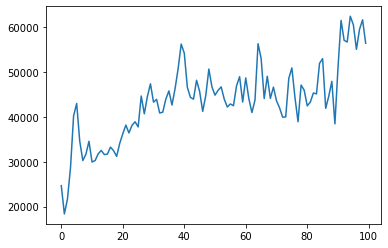

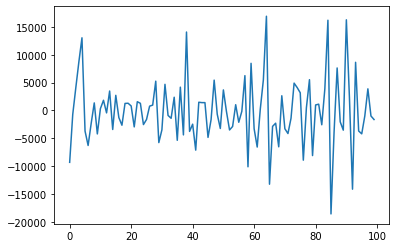

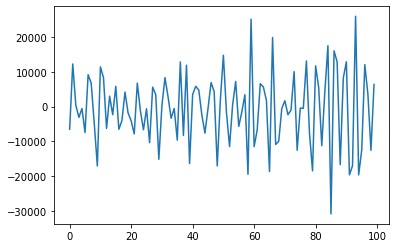

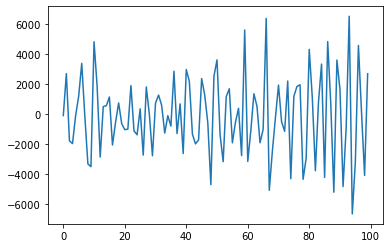

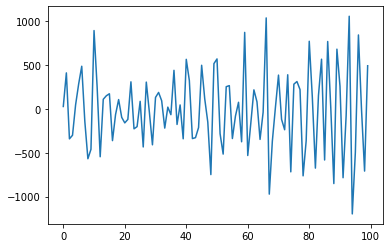

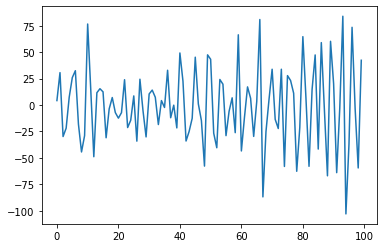

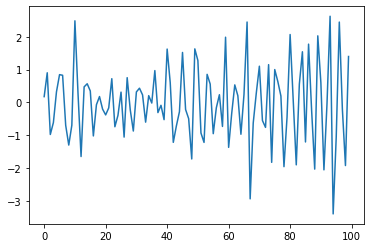

'\nprint(serie_list.head())\n# line plot\npyplot.plot(serie_list)\n'

In [1]:
#Leer datos
import pandas as pd
import numpy as np
import math

#df = pd.read_excel('thetaevolutionexample.xlsx')
#df = pd.read_csv('Tuesday_concat_traffic.csv', names=['Traffic_data']) #Con names añadimos una cabecera

#Read theta_series:
all_series = np.loadtxt('All_series.txt', delimiter=',')
thetaParams = np.loadtxt('TP30_7.txt', delimiter=',')

Tsventana = 30*60
n = 7
n_coefs = n+1
n_series = int(thetaParams.shape[1]/n_coefs)

diezmado = 180; #[s]
n_ventanas = math.ceil(thetaParams.shape[0]/diezmado)

theta_series_v2 = np.zeros((n_series, n_coefs, n_ventanas))

for serie in range(1, n_series+1):
    for c in range(1, n_coefs+1):
        theta_evolution = thetaParams[::diezmado, (serie-1)*n_coefs+c-1]
        theta_series_v2[serie-1][c-1] = theta_evolution

semana = 9 #Indexada desde el 0 incluido
time_serie = all_series[semana]

tiempo_final = 44421; #Segundo final del que se conocen datos (en segundos, desde las 00:00:00 del lunes)
#Ejemplo bueno: 50421 como tiempo final
#Ejemplo malo: 45001 como tiempo final
hora_final = tiempo_final/3600
minuto_final = (hora_final-int(hora_final))*60
segundo_final = (minuto_final-int(minuto_final))*60

print('Última ventana conocida: Lunes [00:00:00] + ['+str(int(hora_final))+'h, '+str(int(minuto_final))+'min, '+str(int(segundo_final))+'s]\n')

final = round(tiempo_final/diezmado); #Punto final
T_train = 100*diezmado

T_train = round(T_train/diezmado)
inicio_train = final - T_train + 1

in_seq0 = theta_series_v2[semana][0][inicio_train:final+1]
in_seq1 = theta_series_v2[semana][1][inicio_train:final+1]
in_seq2 = theta_series_v2[semana][2][inicio_train:final+1]
in_seq3 = theta_series_v2[semana][3][inicio_train:final+1]
in_seq4 = theta_series_v2[semana][4][inicio_train:final+1]
in_seq5 = theta_series_v2[semana][5][inicio_train:final+1]
in_seq6 = theta_series_v2[semana][6][inicio_train:final+1]
in_seq7 = theta_series_v2[semana][7][inicio_train:final+1]

#serie = df.squeeze()
#serie_list = serie.tolist()
#serie_list = serie_list[-2500:]

# summarize first few rows
from matplotlib import pyplot as plt
plt.plot(in_seq0)
plt.show()
plt.plot(in_seq1)
plt.show()
plt.plot(in_seq2)
plt.show()
plt.plot(in_seq4)
plt.show()
plt.plot(in_seq5)
plt.show()
plt.plot(in_seq6)
plt.show()
plt.plot(in_seq7)
plt.show()
"""
print(serie_list.head())
# line plot
pyplot.plot(serie_list)
"""


In [2]:
from numpy import mean, std, tanh
#Funciones de normalización
def normalizeData_zscore(data):
    mu = mean(data)
    sigma = std(data)
    result = (data-mu)/sigma
    return result, mu, sigma
def normalizeData_zscore_using_scalerData(data, mu, sigma):
    result = (data-mu)/sigma
    return result
def un_normalizeData_zscore(data, mu, sigma):
    result = data*sigma+mu
    return result

In [3]:
#SIMPLE EXPONENTIAL SMOOTHING
from typing import List
def simple_es(series: List, alpha: float) -> float:
    if len(series) <= 1:
        return series[0]

    return (alpha * series[-1]) + ((1 - alpha) * simple_es(series[:-1], alpha))

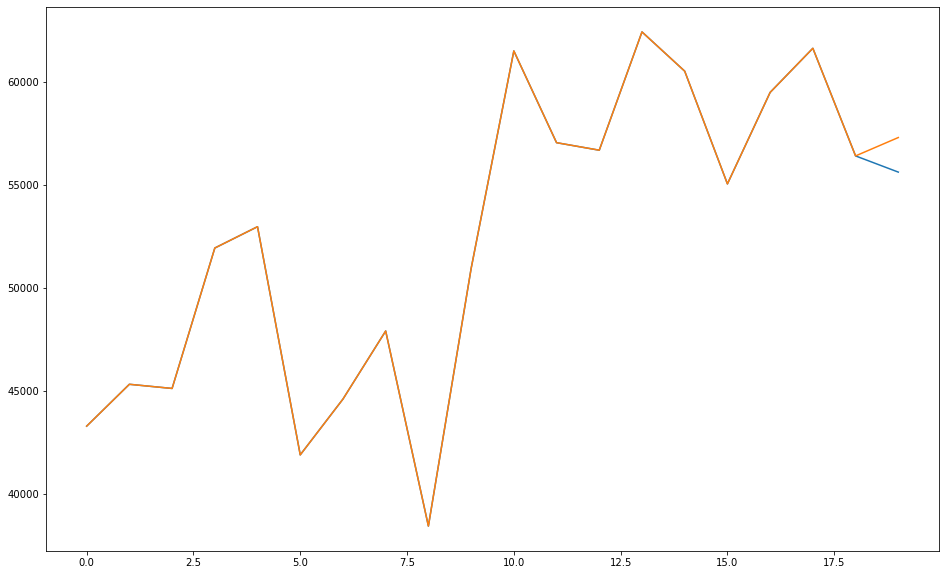

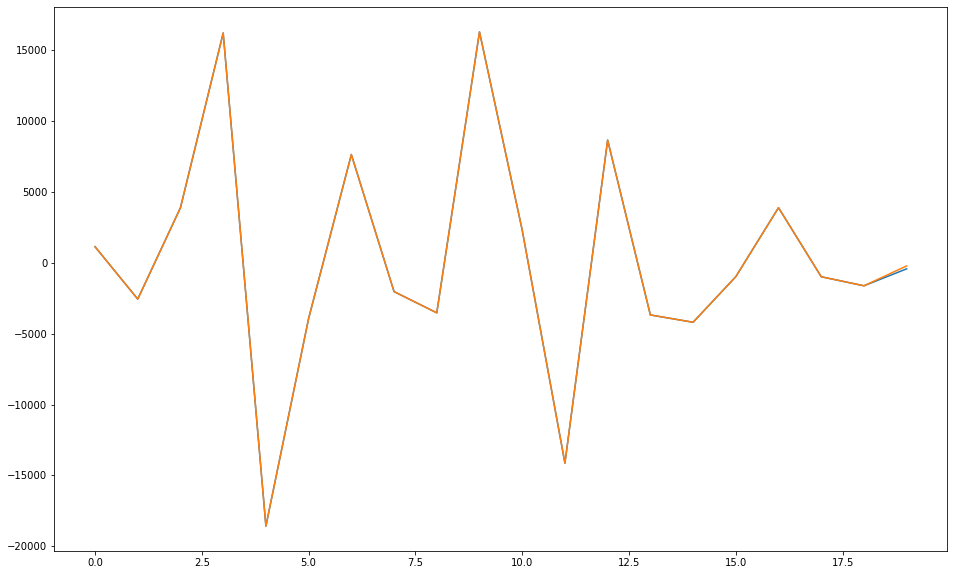

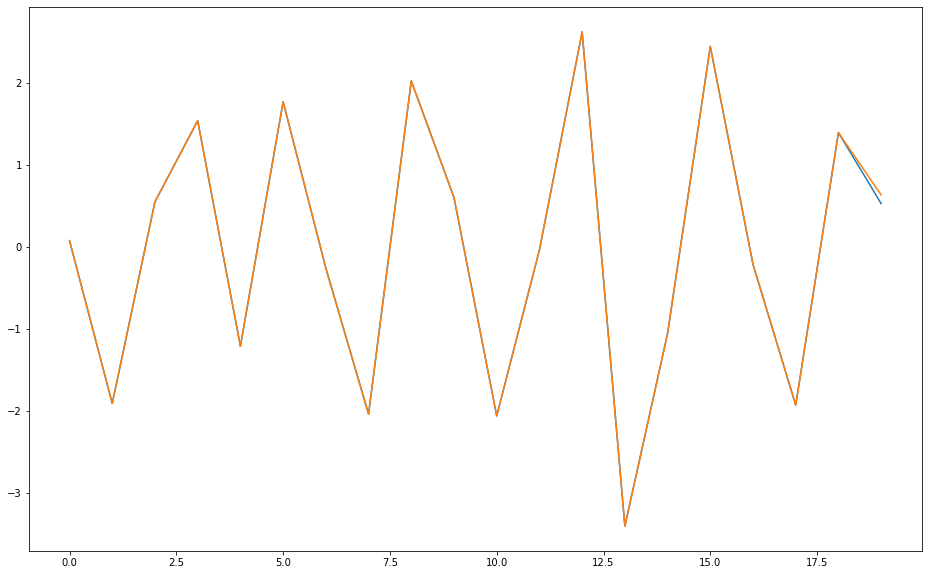

Real vs Predicted:

55634.7060412431 --- 57313.698095627624
-428.862228543244 --- -221.46042815592236
5409.10420983531 --- 649.9381377928876
4516.63291647322 --- 3273.18322804791
1479.37282456269 --- 1542.70851629264
234.294674292178 --- 283.40628027057437
17.90926744823 --- 21.733343279551946
0.530173797617685 --- 0.6357207083668311


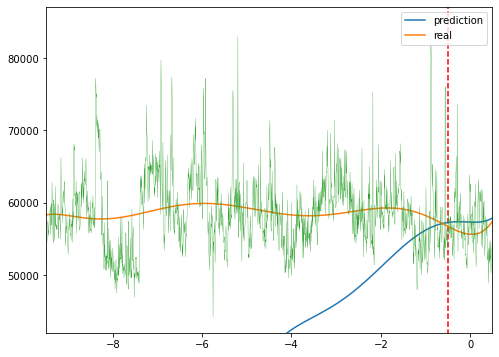

In [4]:
#SIMPLE EXPONENTIAL SMOOTHING
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

'''
df = pd.read_excel('thetaevolutionexample.xlsx')
#df = pd.read_csv('Tuesday_concat_traffic.csv', names=['Traffic_data']) #Con names añadimos una cabecera

serie = df.squeeze()
serie_list = serie.tolist()
serie_list = serie_list[-2500:]

# summarize first few rows
from matplotlib import pyplot as plt
'''

future_points = 1
scope = future_points*diezmado

in_seq0 = theta_series_v2[semana][0][inicio_train:final+1+future_points]
in_seq1 = theta_series_v2[semana][1][inicio_train:final+1+future_points]
in_seq2 = theta_series_v2[semana][2][inicio_train:final+1+future_points]
in_seq3 = theta_series_v2[semana][3][inicio_train:final+1+future_points]
in_seq4 = theta_series_v2[semana][4][inicio_train:final+1+future_points]
in_seq5 = theta_series_v2[semana][5][inicio_train:final+1+future_points]
in_seq6 = theta_series_v2[semana][6][inicio_train:final+1+future_points]
in_seq7 = theta_series_v2[semana][7][inicio_train:final+1+future_points]

prediction0, mu0, sigma0 = normalizeData_zscore(np.array(in_seq0[:-future_points]))
prediction0 = list(in_seq0[:-future_points])
prediction0 = list(prediction0)
for i in range(future_points):
    forecast = simple_es(prediction0, alpha=0.81)
    prediction0.append(forecast)
#prediction0 = un_normalizeData_zscore(np.array(prediction0), mu0, sigma0)

#prediction contiene la secuencia original + la predicción de L_t
#L_t solo contiene la predicción propiamente dicha L_t
L_t0 = prediction0[-future_points:]


plt.figure(
    figsize=(16, 10)
)
plt.plot(in_seq0[-20:])
plt.plot(prediction0[-20:])
plt.show()

#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------

prediction1, mu1, sigma1 = normalizeData_zscore(np.array(in_seq1[:-future_points]))
prediction1 = list(in_seq1[:-future_points])
prediction1 = list(prediction1)
for i in range(future_points):
    forecast = simple_es(prediction1, alpha=0.05)
    prediction1.append(forecast)
#prediction1 = un_normalizeData_zscore(np.array(prediction1), mu1, sigma1)

#prediction contiene la secuencia original + la predicción de L_t
#L_t solo contiene la predicción propiamente dicha L_t
L_t1 = prediction1[-future_points:]

plt.figure(
    figsize=(16, 10)
)
plt.plot(in_seq1[-20:])
plt.plot(prediction1[-20:])
plt.show()

#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------

prediction2, mu2, sigma2 = normalizeData_zscore(np.array(in_seq2[:-future_points]))
prediction2 = list(in_seq2[:-future_points])
prediction2 = list(prediction2)
for i in range(future_points):
    forecast = simple_es(prediction2, alpha=0.5)
    prediction2.append(forecast)
#prediction2 = un_normalizeData_zscore(np.array(prediction2), mu2, sigma2)

#prediction contiene la secuencia original + la predicción de L_t
#L_t solo contiene la predicción propiamente dicha L_t
L_t2 = prediction2[-future_points:]
'''
plt.figure(
    figsize=(16, 10)
)
plt.plot(in_seq2[-20:])
plt.plot(prediction2[-20:])
plt.show()
'''
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------

prediction3, mu3, sigma3 = normalizeData_zscore(np.array(in_seq3[:-future_points]))
prediction3 = list(in_seq3[:-future_points])
prediction3 = list(prediction3)
for i in range(future_points):
    forecast = simple_es(prediction3, alpha=0.75)
    prediction3.append(forecast)
#prediction3 = un_normalizeData_zscore(np.array(prediction3), mu3, sigma3)

#prediction contiene la secuencia original + la predicción de L_t
#L_t solo contiene la predicción propiamente dicha L_t
L_t3 = prediction3[-future_points:]
'''
plt.figure(
    figsize=(16, 10)
)
plt.plot(in_seq3[-20:])
plt.plot(prediction3[-20:])
plt.show()
'''
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------

prediction4, mu4, sigma4 = normalizeData_zscore(np.array(in_seq4[:-future_points]))
prediction4 = list(in_seq4[:-future_points])
prediction4 = list(prediction4)
for i in range(future_points):
    forecast = simple_es(prediction4, alpha=0.8)
    prediction4.append(forecast)
#prediction4 = un_normalizeData_zscore(np.array(prediction4), mu4, sigma4)

#prediction contiene la secuencia original + la predicción de L_t
#L_t solo contiene la predicción propiamente dicha L_t
L_t4 = prediction4[-future_points:]
'''
plt.figure(
    figsize=(16, 10)
)
plt.plot(in_seq4[-20:])
plt.plot(prediction4[-20:])
plt.show()
'''

#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------

prediction5, mu5, sigma5 = normalizeData_zscore(np.array(in_seq5[:-future_points]))
prediction5 = list(in_seq5[:-future_points])
prediction5 = list(prediction5)
for i in range(future_points):
    forecast = simple_es(prediction5, alpha=0.8)
    prediction5.append(forecast)
#prediction5 = un_normalizeData_zscore(np.array(prediction5), mu5, sigma5)

#prediction contiene la secuencia original + la predicción de L_t
#L_t solo contiene la predicción propiamente dicha L_t
L_t5 = prediction5[-future_points:]
'''
plt.figure(
    figsize=(16, 10)
)
plt.plot(in_seq5[-20:])
plt.plot(prediction5[-20:])
plt.show()
'''

#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------

prediction6, mu6, sigma6 = normalizeData_zscore(np.array(in_seq6[:-future_points]))
prediction6 = list(in_seq6[:-future_points])
prediction6 = list(prediction6)
for i in range(future_points):
    forecast = simple_es(prediction6, alpha=0.76)
    prediction6.append(forecast)
#prediction6 = un_normalizeData_zscore(np.array(prediction6), mu6, sigma6)

#prediction contiene la secuencia original + la predicción de L_t
#L_t solo contiene la predicción propiamente dicha L_t
L_t6 = prediction6[-future_points:]
'''
plt.figure(
    figsize=(16, 10)
)
plt.plot(in_seq6[-20:])
plt.plot(prediction6[-20:])
plt.show()
'''
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------

prediction7, mu7, sigma7 = normalizeData_zscore(np.array(in_seq7[:-future_points]))
prediction7 = list(in_seq7[:-future_points])
prediction7 = list(prediction7)
for i in range(future_points):
    forecast = simple_es(prediction7, alpha=0.72)
    prediction7.append(forecast)
#prediction7 = un_normalizeData_zscore(np.array(prediction7), mu7, sigma7)

#prediction contiene la secuencia original + la predicción de L_t
#L_t solo contiene la predicción propiamente dicha L_t
L_t7 = prediction7[-future_points:]

plt.figure(
    figsize=(16, 10)
)
plt.plot(in_seq7[-20:])
plt.plot(prediction7[-20:])
plt.show()

#Predicted params:
theta0_ = prediction0[-1]
theta1_ = prediction1[-1]
theta2_ = prediction2[-1]
theta3_ = prediction3[-1]
theta4_ = prediction4[-1]
theta5_ = prediction5[-1]
theta6_ = prediction6[-1]
theta7_ = prediction7[-1]

#True params:
theta0 = in_seq0[-1]
theta1 = in_seq1[-1]
theta2 = in_seq2[-1]
theta3 = in_seq3[-1]
theta4 = in_seq4[-1]
theta5 = in_seq5[-1]
theta6 = in_seq6[-1]
theta7 = in_seq7[-1]

print('Real vs Predicted:\n')
print(str(theta0) + ' --- ' + str(theta0_))
print(str(theta1) + ' --- ' + str(theta1_))
print(str(theta2) + ' --- ' + str(theta2_))
print(str(theta3) + ' --- ' + str(theta3_))
print(str(theta4) + ' --- ' + str(theta4_))
print(str(theta5) + ' --- ' + str(theta5_))
print(str(theta6) + ' --- ' + str(theta6_))
print(str(theta7) + ' --- ' + str(theta7_))

#Window + Predicted trend:
window_selected_index = round((tiempo_final+scope)/diezmado)
Window_Selected = time_serie[window_selected_index*diezmado:window_selected_index*diezmado+Tsventana]

t = np.linspace(-(Tsventana-1), 0, Tsventana) + math.ceil(scope/2)
t_step = 1/(2*t[-1])
t = t*t_step
pol = theta0 + theta1*t + theta2*pow(t,2) + theta3*pow(t,3) + theta4*pow(t,4) + theta5*pow(t,5) + theta6*pow(t,6) + theta7*pow(t,7)
pol_ = theta0_ + theta1_*t + theta2_*pow(t,2) + theta3_*pow(t,3) + theta4_*pow(t,4) + theta5_*pow(t,5) + theta6_*pow(t,6) + theta7_*pow(t,7)

fig, ax = pyplot.subplots(figsize=(8, 6)) #New figure
ax.plot(t, pol_);
ax.plot(t, pol);
pyplot.legend(['prediction', 'real'], loc='upper right')
pyplot.vlines(t[-scope], 0, 1.05*max(Window_Selected), linestyles ="dashed", colors="r")
ax.set_xlim(t[0], t[-1])
ax.plot(t, Window_Selected, linewidth=0.3);
pyplot.ylim((0.95*min(Window_Selected), 1.05*max(Window_Selected)))

np.savetxt('outputsHoltWintersAndAR/WindowTest.txt', Window_Selected, delimiter=',');
np.savetxt('outputsHoltWintersAndAR/polTruth.txt', pol, delimiter=',');
np.savetxt('outputsHoltWintersAndAR/polPredicted.txt', pol_, delimiter=',');

In [5]:
#HOLT'S EXPONENTIAL SMOOTHING
def holt_es(series: List, alpha: float, 
            beta: float, initial_trend: float) -> float:
    if len(series) <= 1:
        return initial_trend

    l_t = simple_es(series, alpha)
    l_t_prev = simple_es(series[:-1], alpha)

    trend_t_prev = holt_es(series[:-1], alpha, beta, initial_trend)

    return (beta * (l_t - l_t_prev)) + ((1 - beta) * trend_t_prev)

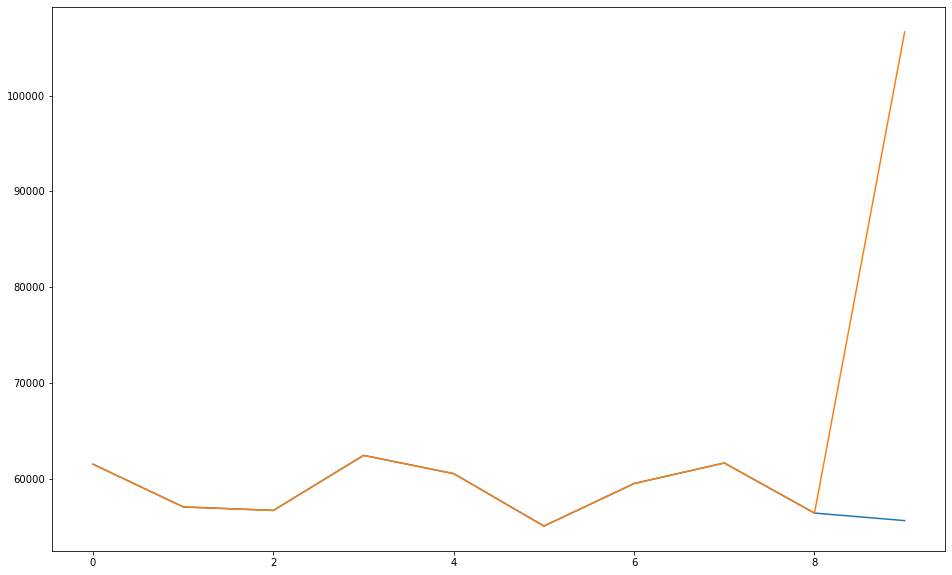

In [6]:
#HOLT'S EXPONENTIAL SMOOTHING
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

'''
df = pd.read_excel('thetaevolutionexample.xlsx')
#df = pd.read_csv('Tuesday_concat_traffic.csv', names=['Traffic_data']) #Con names añadimos una cabecera

serie = df.squeeze()
serie_list = serie.tolist()
serie_list = serie_list[-2500:]

# summarize first few rows
from matplotlib import pyplot as plt
'''

future_points = 1
scope = future_points*diezmado

in_seq0 = theta_series_v2[semana][0][inicio_train:final+1+future_points]
in_seq1 = theta_series_v2[semana][1][inicio_train:final+1+future_points]
in_seq2 = theta_series_v2[semana][2][inicio_train:final+1+future_points]
in_seq3 = theta_series_v2[semana][3][inicio_train:final+1+future_points]
in_seq4 = theta_series_v2[semana][4][inicio_train:final+1+future_points]
in_seq5 = theta_series_v2[semana][5][inicio_train:final+1+future_points]
in_seq6 = theta_series_v2[semana][6][inicio_train:final+1+future_points]
in_seq7 = theta_series_v2[semana][7][inicio_train:final+1+future_points]


level0 = np.array(in_seq0[:-future_points])
level0 = list(level0)
for i in range(future_points):
    forecast = simple_es(level0, alpha=0.81)
    level0.append(forecast)
#level contiene la secuencia original + la predicción de L_t
#L_t solo contiene la predicción propiamente dicha L_t
L_t0 = level0[-future_points:]
trend0 = np.array(in_seq0[:-future_points])
trend0 = list(trend0)
initial_trend = in_seq0[1] - in_seq0[0]
for i in range(future_points):
    forecast = holt_es(trend0, alpha=0.81, beta=0, initial_trend=initial_trend)
    trend0.append(forecast)
#trend contiene la secuencia original + la predicción de la trend
#T_t solo contiene la predicción propiamente dicha L_t
T_t0 = trend0[-future_points:]

forecast_additive0 = [L_t0[i] + (i+1)*T_t0[i] for i in range(future_points)]
result_additive0 = in_seq0[-future_points:] + forecast_additive0

predicted0 = np.concatenate((in_seq0[:-future_points], result_additive0))

plt.figure(
    figsize=(16, 10)
)
plt.plot(in_seq0[-10:])
plt.plot(predicted0[-10:])
plt.show()

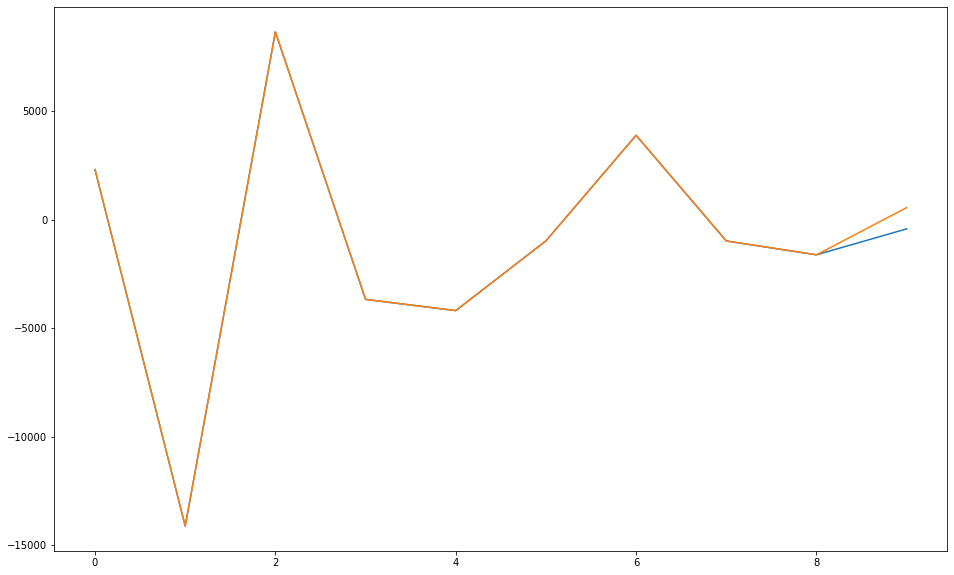

In [7]:

#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------

level1 = np.array(in_seq1[:-future_points])
level1 = list(level1)
for i in range(future_points):
    forecast = simple_es(level1, alpha=0.05)
    level1.append(forecast)
#level contiene la secuencia original + la predicción de L_t
#L_t solo contiene la predicción propiamente dicha L_t
L_t1 = level1[-future_points:]
trend1 = np.array(in_seq1[:-future_points])
trend1 = list(trend1)
initial_trend = in_seq1[1] - in_seq1[0]
for i in range(future_points):
    forecast = holt_es(trend1, alpha=0.05, beta=0.02, initial_trend=initial_trend)
    trend1.append(forecast)
#trend contiene la secuencia original + la predicción de la trend
#T_t solo contiene la predicción propiamente dicha L_t
T_t1 = trend1[-future_points:]

forecast_additive1 = [L_t1[i] + (i+1)*T_t1[i] for i in range(future_points)]
result_additive1 = in_seq1[-future_points:] + forecast_additive1

predicted1 = np.concatenate((in_seq1[:-future_points], result_additive1))

plt.figure(
    figsize=(16, 10)
)
plt.plot(in_seq1[-10:])
plt.plot(predicted1[-10:])
plt.show()


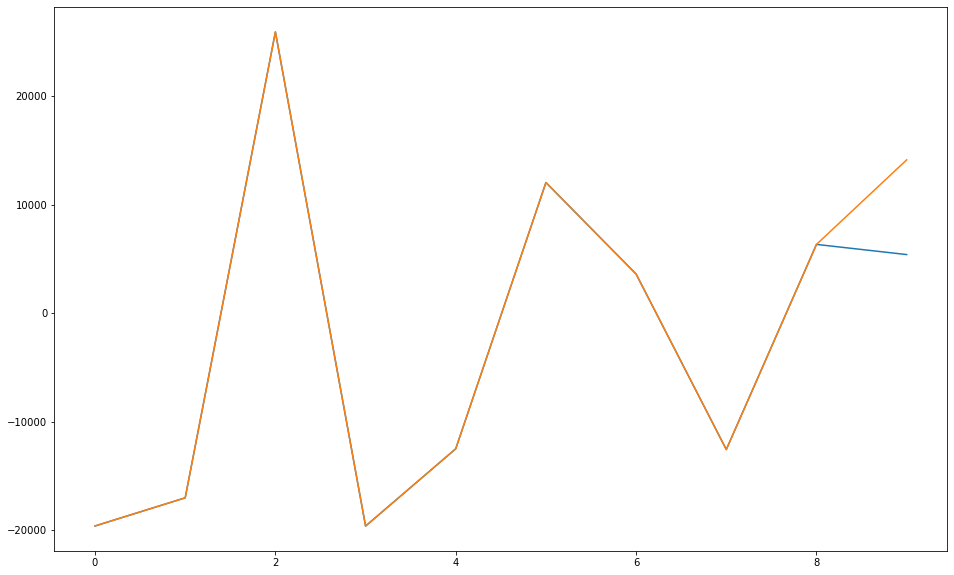

In [8]:


#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------

level2 = np.array(in_seq2[:-future_points])
level2 = list(level2)
for i in range(future_points):
    forecast = simple_es(level2, alpha=0.5)
    level2.append(forecast)
#level contiene la secuencia original + la predicción de L_t
#L_t solo contiene la predicción propiamente dicha L_t
L_t2 = level2[-future_points:]
trend2 = np.array(in_seq2[:-future_points])
trend2 = list(trend2)
initial_trend = in_seq2[1] - in_seq2[0]
for i in range(future_points):
    forecast = holt_es(trend2, alpha=0.5, beta=0.0085, initial_trend=initial_trend)
    trend2.append(forecast)
#trend contiene la secuencia original + la predicción de la trend
#T_t solo contiene la predicción propiamente dicha L_t
T_t2 = trend2[-future_points:]

forecast_additive2 = [L_t2[i] + (i+1)*T_t2[i] for i in range(future_points)]
result_additive2 = in_seq2[-future_points:] + forecast_additive2

predicted2 = np.concatenate((in_seq2[:-future_points], result_additive2))

plt.figure(
    figsize=(16, 10)
)
plt.plot(in_seq2[-10:])
plt.plot(predicted2[-10:])
plt.show()


#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------


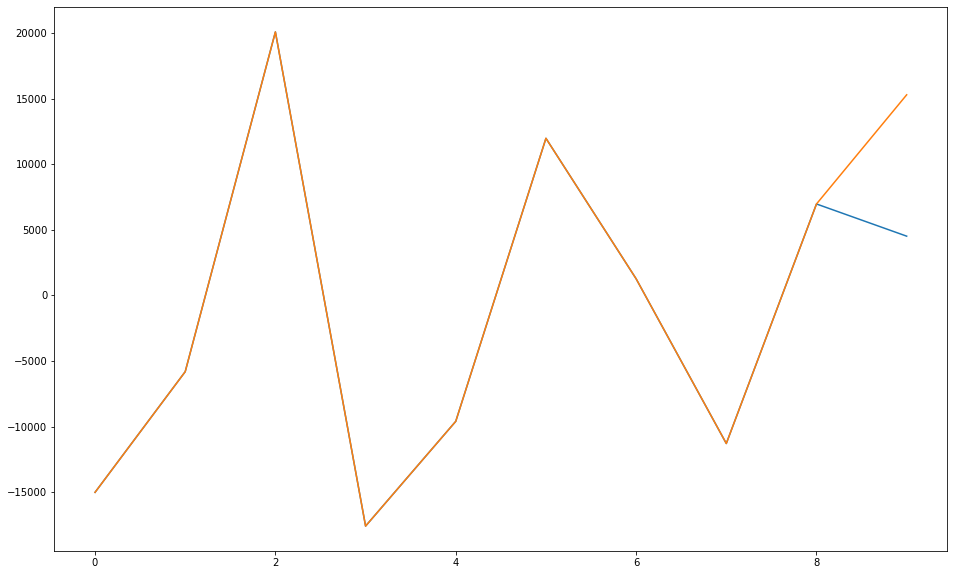

In [9]:

level3 = np.array(in_seq3[:-future_points])
level3 = list(level3)
for i in range(future_points):
    forecast = simple_es(level3, alpha=0.75)
    level3.append(forecast)
#level contiene la secuencia original + la predicción de L_t
#L_t solo contiene la predicción propiamente dicha L_t
L_t3 = level3[-future_points:]
trend3 = np.array(in_seq3[:-future_points])
trend3 = list(trend3)
initial_trend = in_seq3[1] - in_seq3[0]
for i in range(future_points):
    forecast = holt_es(trend3, alpha=0.75, beta=0.0035, initial_trend=initial_trend)
    trend3.append(forecast)
#trend contiene la secuencia original + la predicción de la trend
#T_t solo contiene la predicción propiamente dicha L_t
T_t3 = trend3[-future_points:]

forecast_additive3 = [L_t3[i] + (i+1)*T_t3[i] for i in range(future_points)]
result_additive3 = in_seq3[-future_points:] + forecast_additive3

predicted3 = np.concatenate((in_seq3[:-future_points], result_additive3))

plt.figure(
    figsize=(16, 10)
)
plt.plot(in_seq3[-10:])
plt.plot(predicted3[-10:])
plt.show()

#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------


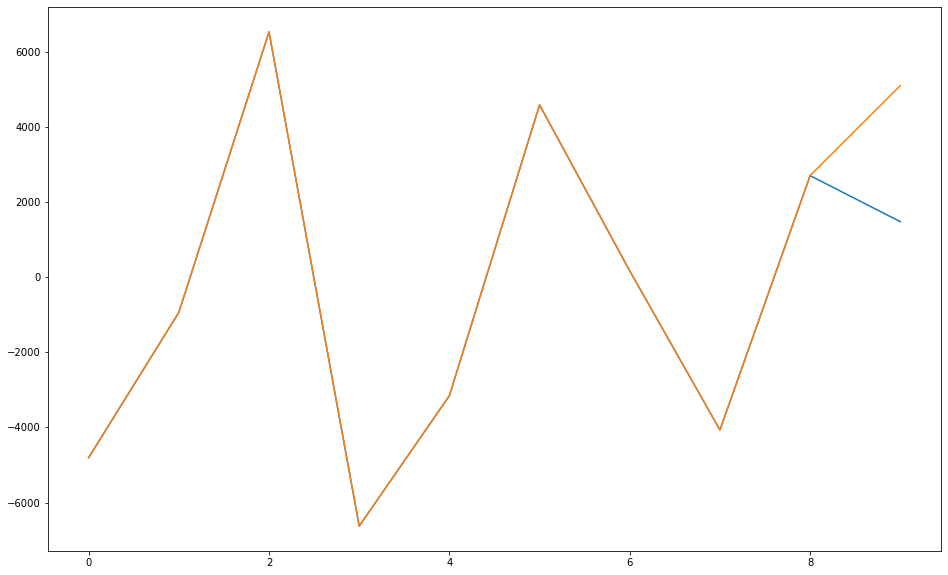

In [10]:

level4 = np.array(in_seq4[:-future_points])
level4 = list(level4)
for i in range(future_points):
    forecast = simple_es(level4, alpha=0.8)
    level4.append(forecast)
#level contiene la secuencia original + la predicción de L_t
#L_t solo contiene la predicción propiamente dicha L_t
L_t4 = level4[-future_points:]
trend4 = np.array(in_seq4[:-future_points])
trend4 = list(trend4)
initial_trend = in_seq4[1] - in_seq4[0]
for i in range(future_points):
    forecast = holt_es(trend4, alpha=0.8, beta=0.003, initial_trend=initial_trend)
    trend4.append(forecast)
#trend contiene la secuencia original + la predicción de la trend
#T_t solo contiene la predicción propiamente dicha L_t
T_t4 = trend4[-future_points:]

forecast_additive4 = [L_t4[i] + (i+1)*T_t4[i] for i in range(future_points)]
result_additive4 = in_seq4[-future_points:] + forecast_additive4

predicted4 = np.concatenate((in_seq4[:-future_points], result_additive4))

plt.figure(
    figsize=(16, 10)
)
plt.plot(in_seq4[-10:])
plt.plot(predicted4[-10:])
plt.show()


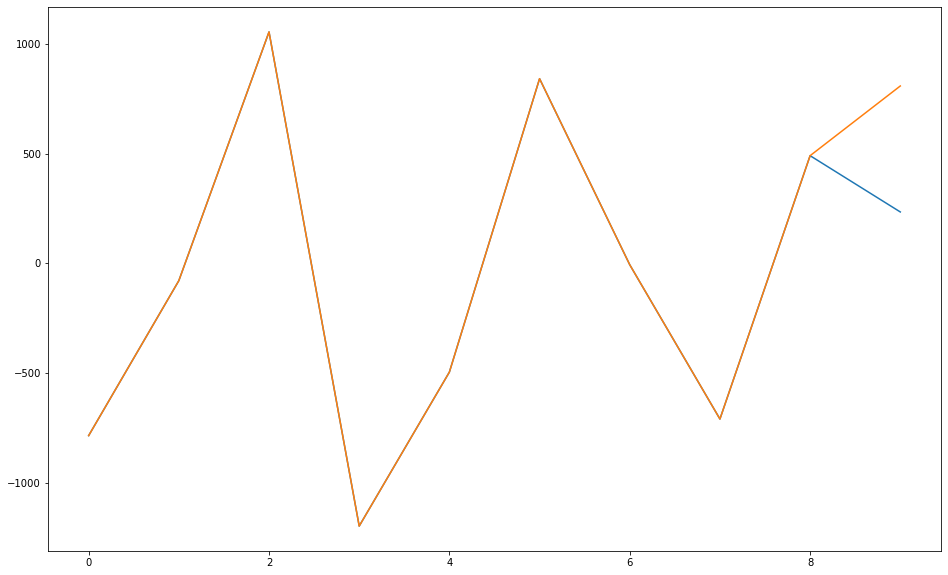

In [11]:

#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------

level5 = np.array(in_seq5[:-future_points])
level5 = list(level5)
for i in range(future_points):
    forecast = simple_es(level5, alpha=0.8)
    level5.append(forecast)
#level contiene la secuencia original + la predicción de L_t
#L_t solo contiene la predicción propiamente dicha L_t
L_t5 = level5[-future_points:]
trend5 = np.array(in_seq5[:-future_points])
trend5 = list(trend5)
initial_trend = in_seq5[1] - in_seq5[0]
for i in range(future_points):
    forecast = holt_es(trend5, alpha=0.8, beta=0.0028, initial_trend=initial_trend)
    trend5.append(forecast)
#trend contiene la secuencia original + la predicción de la trend
#T_t solo contiene la predicción propiamente dicha L_t
T_t5 = trend5[-future_points:]

forecast_additive5 = [L_t5[i] + (i+1)*T_t5[i] for i in range(future_points)]
result_additive5 = in_seq5[-future_points:] + forecast_additive5

predicted5 = np.concatenate((in_seq5[:-future_points], result_additive5))

plt.figure(
    figsize=(16, 10)
)
plt.plot(in_seq5[-10:])
plt.plot(predicted5[-10:])
plt.show()



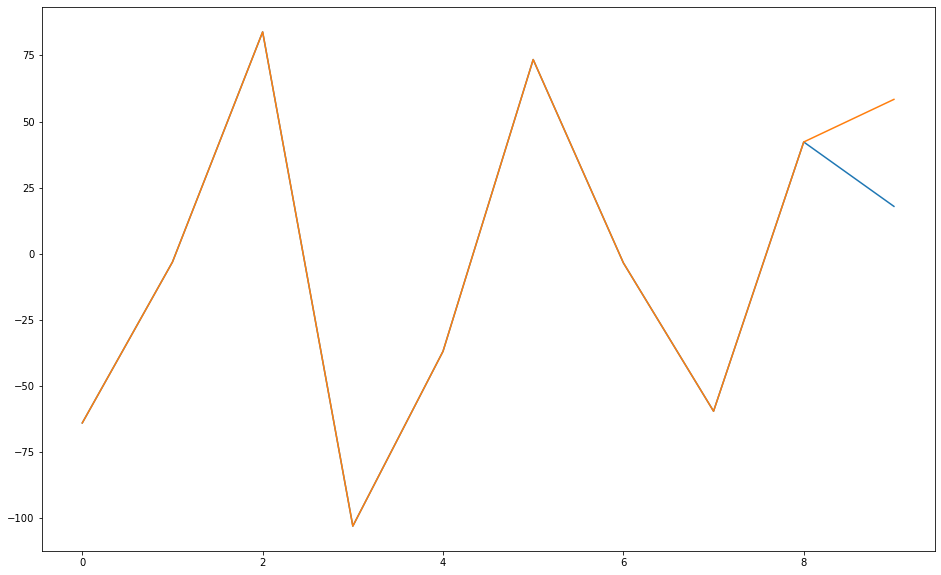

In [12]:

#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------

level6 = np.array(in_seq6[:-future_points])
level6 = list(level6)
for i in range(future_points):
    forecast = simple_es(level6, alpha=0.76)
    level6.append(forecast)
#level contiene la secuencia original + la predicción de L_t
#L_t solo contiene la predicción propiamente dicha L_t
L_t6 = level6[-future_points:]
trend6 = np.array(in_seq6[:-future_points])
trend6 = list(trend6)
initial_trend = in_seq6[1] - in_seq6[0]
for i in range(future_points):
    forecast = holt_es(trend6, alpha=0.76, beta=0.0035, initial_trend=initial_trend)
    trend6.append(forecast)
#trend contiene la secuencia original + la predicción de la trend
#T_t solo contiene la predicción propiamente dicha L_t
T_t6 = trend6[-future_points:]

forecast_additive6 = [L_t6[i] + (i+1)*T_t6[i] for i in range(future_points)]
result_additive6 = in_seq6[-future_points:] + forecast_additive6

predicted6 = np.concatenate((in_seq6[:-future_points], result_additive6))

plt.figure(
    figsize=(16, 10)
)
plt.plot(in_seq6[-10:])
plt.plot(predicted6[-10:])
plt.show()


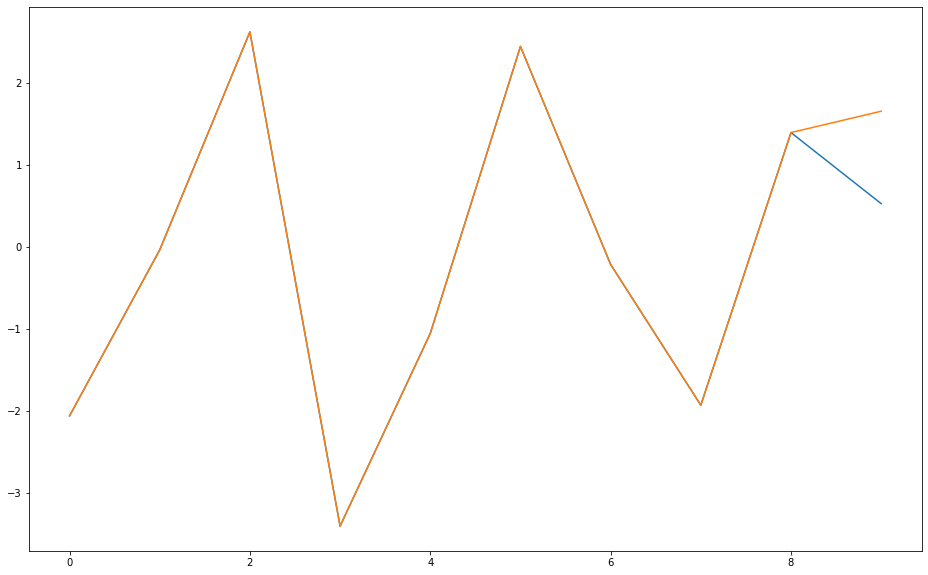

In [13]:

#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------

level7 = np.array(in_seq7[:-future_points])
level7 = list(level7)
for i in range(future_points):
    forecast = simple_es(level7, alpha=0.72)
    level7.append(forecast)
#level contiene la secuencia original + la predicción de L_t
#L_t solo contiene la predicción propiamente dicha L_t
L_t7 = level7[-future_points:]
trend7 = np.array(in_seq7[:-future_points])
trend7 = list(trend7)
initial_trend = in_seq7[1] - in_seq7[0]
for i in range(future_points):
    forecast = holt_es(trend7, alpha=0.72, beta=0.004, initial_trend=initial_trend)
    trend7.append(forecast)
#trend contiene la secuencia original + la predicción de la trend
#T_t solo contiene la predicción propiamente dicha L_t
T_t7 = trend7[-future_points:]

forecast_additive7 = [L_t7[i] + (i+1)*T_t7[i] for i in range(future_points)]
result_additive7 = in_seq7[-future_points:] + forecast_additive7

predicted7 = np.concatenate((in_seq7[:-future_points], result_additive7))

plt.figure(
    figsize=(16, 10)
)
plt.plot(in_seq7[-10:])
plt.plot(predicted7[-10:])
plt.show()

Real vs Predicted:

55634.7060412431 --- 55634.7060412431
-428.862228543244 --- 552.8504412389875
5409.10420983531 --- 14140.090154169906
4516.63291647322 --- 15295.016893385631
1479.37282456269 --- 5101.095491051679
234.294674292178 --- 808.3761185892093
17.90926744823 --- 58.3869080320801
0.530173797617685 --- 1.6572405975750002


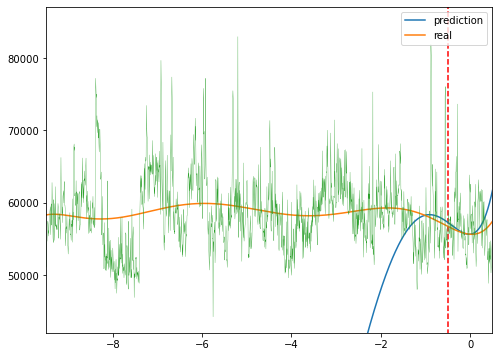

In [27]:
#Predicted params:
#Si no se asume predicción perfecta en theta0:
#theta0_ = predicted0[-1]
#Si se asume predicción perfecta en theta0:
theta0_ = in_seq0[-1]
theta1_ = predicted1[-1]
theta2_ = predicted2[-1]
theta3_ = predicted3[-1]
theta4_ = predicted4[-1]
theta5_ = predicted5[-1]
theta6_ = predicted6[-1]
theta7_ = predicted7[-1]

#True params:
theta0 = in_seq0[-1]
theta1 = in_seq1[-1]
theta2 = in_seq2[-1]
theta3 = in_seq3[-1]
theta4 = in_seq4[-1]
theta5 = in_seq5[-1]
theta6 = in_seq6[-1]
theta7 = in_seq7[-1]

print('Real vs Predicted:\n')
print(str(theta0) + ' --- ' + str(theta0_))
print(str(theta1) + ' --- ' + str(theta1_))
print(str(theta2) + ' --- ' + str(theta2_))
print(str(theta3) + ' --- ' + str(theta3_))
print(str(theta4) + ' --- ' + str(theta4_))
print(str(theta5) + ' --- ' + str(theta5_))
print(str(theta6) + ' --- ' + str(theta6_))
print(str(theta7) + ' --- ' + str(theta7_))

#Window + Predicted trend:
window_selected_index = round((tiempo_final+scope)/diezmado)
Window_Selected = time_serie[window_selected_index*diezmado:window_selected_index*diezmado+Tsventana]

t = np.linspace(-(Tsventana-1), 0, Tsventana) + math.ceil(scope/2)
t_step = 1/(2*t[-1])
t = t*t_step
pol = theta0 + theta1*t + theta2*pow(t,2) + theta3*pow(t,3) + theta4*pow(t,4) + theta5*pow(t,5) + theta6*pow(t,6) + theta7*pow(t,7)
pol_ = theta0_ + theta1_*t + theta2_*pow(t,2) + theta3_*pow(t,3) + theta4_*pow(t,4) + theta5_*pow(t,5) + theta6_*pow(t,6) + theta7_*pow(t,7)

fig, ax = pyplot.subplots(figsize=(8, 6)) #New figure
ax.plot(t, pol_);
ax.plot(t, pol);
pyplot.legend(['prediction', 'real'], loc='upper right')
pyplot.vlines(t[-scope], 0, 1.05*max(Window_Selected), linestyles ="dashed", colors="r")
ax.set_xlim(t[0], t[-1])
ax.plot(t, Window_Selected, linewidth=0.3);
pyplot.ylim((0.95*min(Window_Selected), 1.05*max(Window_Selected)))

np.savetxt('outputsHoltWintersAndAR/WindowTest.txt', Window_Selected, delimiter=',');
np.savetxt('outputsHoltWintersAndAR/polTruth.txt', pol, delimiter=',');
np.savetxt('outputsHoltWintersAndAR/polPredicted.txt', pol_, delimiter=',');

In [15]:
#WINTER'S EXPONENTIAL SMOOTHING

from typing import *

def initial_trend(series: List, uppercase_m: int) -> float:
    return sum([
        float(series[i+uppercase_m] - series[i]) / uppercase_m 
        for i in range(uppercase_m)
    ]) / uppercase_m



def initial_seasonality(series: List, uppercase_m: int) -> List:
    initial_season = []
    n_seasons = int(len(series)/uppercase_m)

    season_averages = [sum(
        series[uppercase_m * i:uppercase_m * i + uppercase_m]
    ) / uppercase_m for i in range(n_seasons)]

    initial_season.extend([
        sum([series[uppercase_m*j+i]-season_averages[j] 
             for j in range(n_seasons)]) / n_seasons 
        for i in range(uppercase_m)
    ])
    
    return initial_season



def winters_es(series: List,
               uppercase_m: int,
               alpha: float,
               beta: float,
               gamma: float,
               future_steps: int=1) -> List:
    
    i_l = [series[0]]
    i_t = [initial_trend(series, uppercase_m)]
    i_s = initial_seasonality(series, uppercase_m)

    forecasts = []
    for t in range(len(series) + future_steps):

        if t >= len(series):
            k = t - len(series) + 1
            forecasts.append(
                (i_l[-1] + k * i_t[-1]) + i_s[t % uppercase_m]
            )

        else:
            l_t = alpha * (series[t] - i_s[t % uppercase_m]) + (1 - alpha) * (i_l[-1] + i_t[-1])

            i_t[-1] = beta * (l_t - i_l[-1]) + (1 - beta) * i_t[-1]
            i_l[-1] = l_t

            i_s[t % uppercase_m] = gamma * (series[t] - l_t) + (1 - gamma) * i_s[t % uppercase_m]

            forecasts.append(
                (i_l[-1] + i_t[-1]) + i_s[t % uppercase_m]
            )

    return forecasts


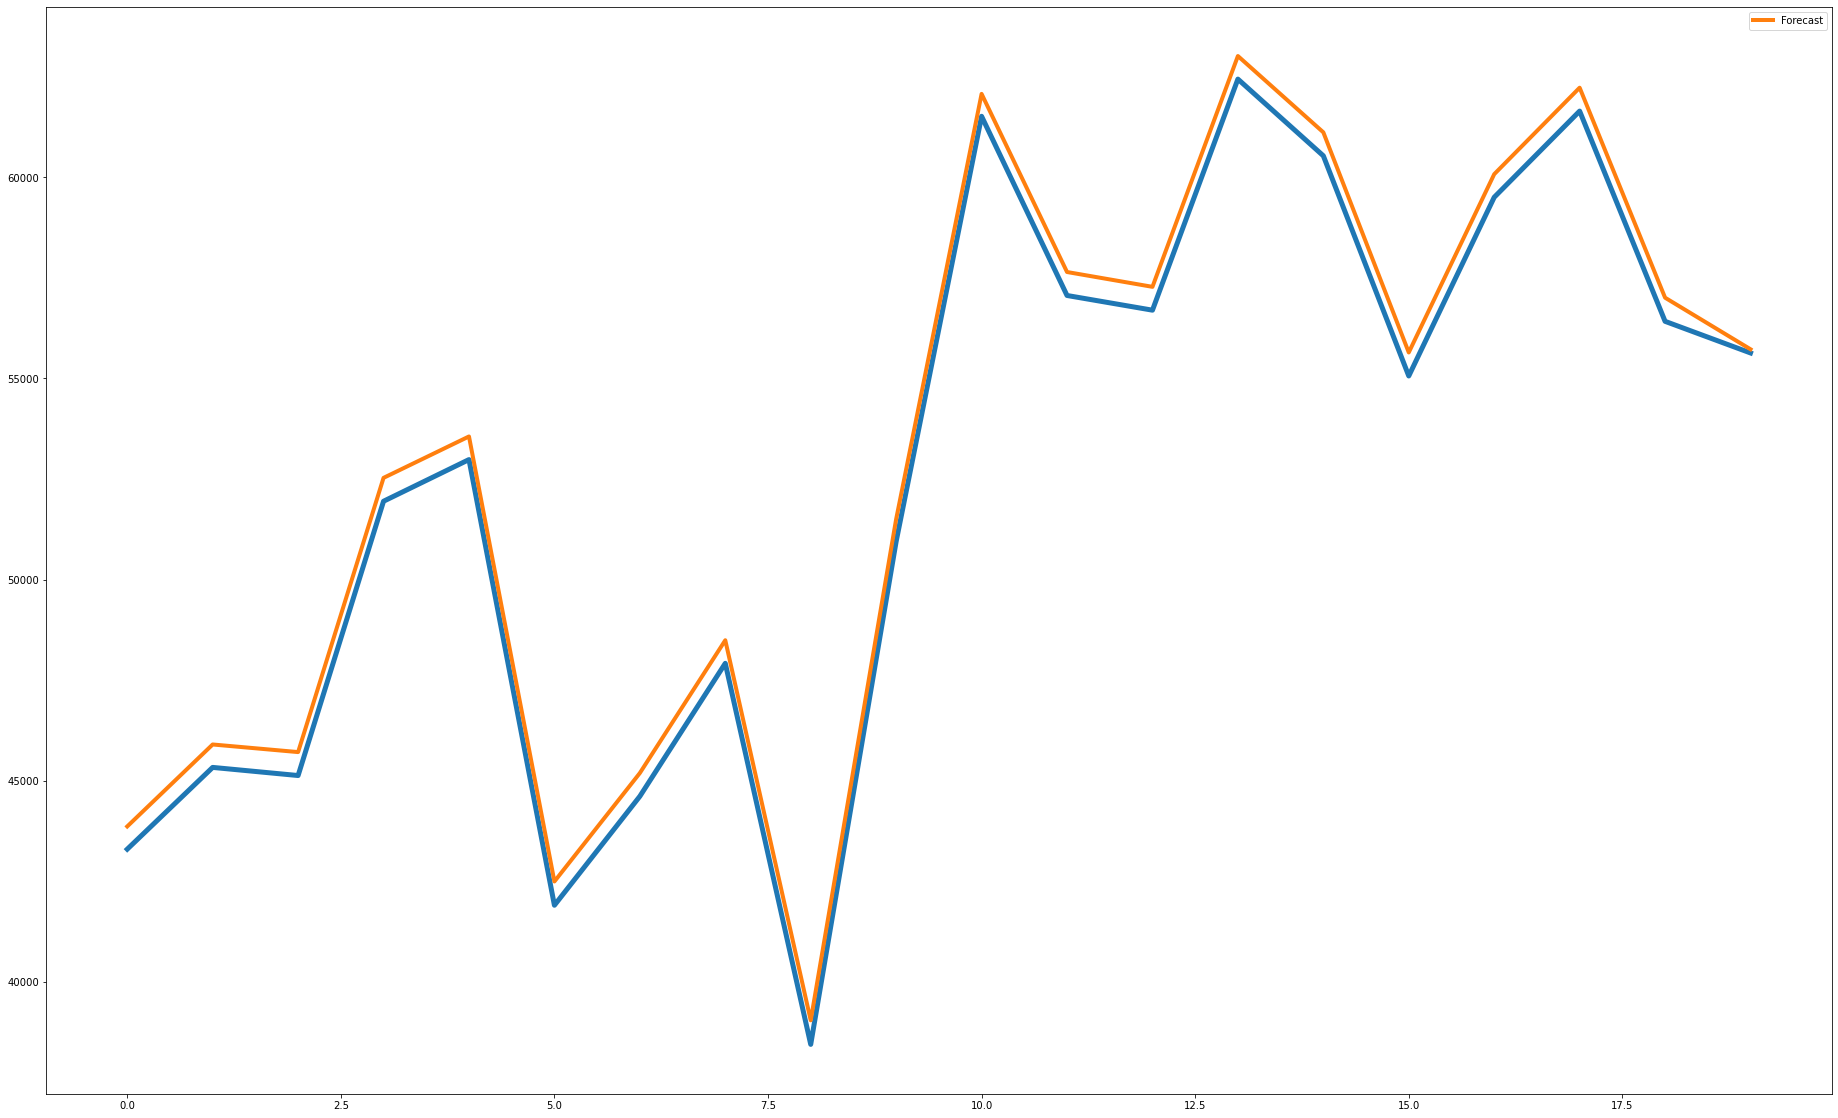

In [16]:
plt.figure(
    figsize=(32, 20)
)


k = 1

last_months = list(range(len(in_seq0)-1, len(in_seq0)-1 + k))



forecast0 = winters_es(in_seq0[:-k], 20, alpha=0.81, beta=0, gamma=0.99, future_steps=k)
plt.plot(in_seq0[-20:], linewidth=5)
plt.plot(forecast0[-20:], linewidth=4, label='Forecast')
plt.legend()
plt.show()

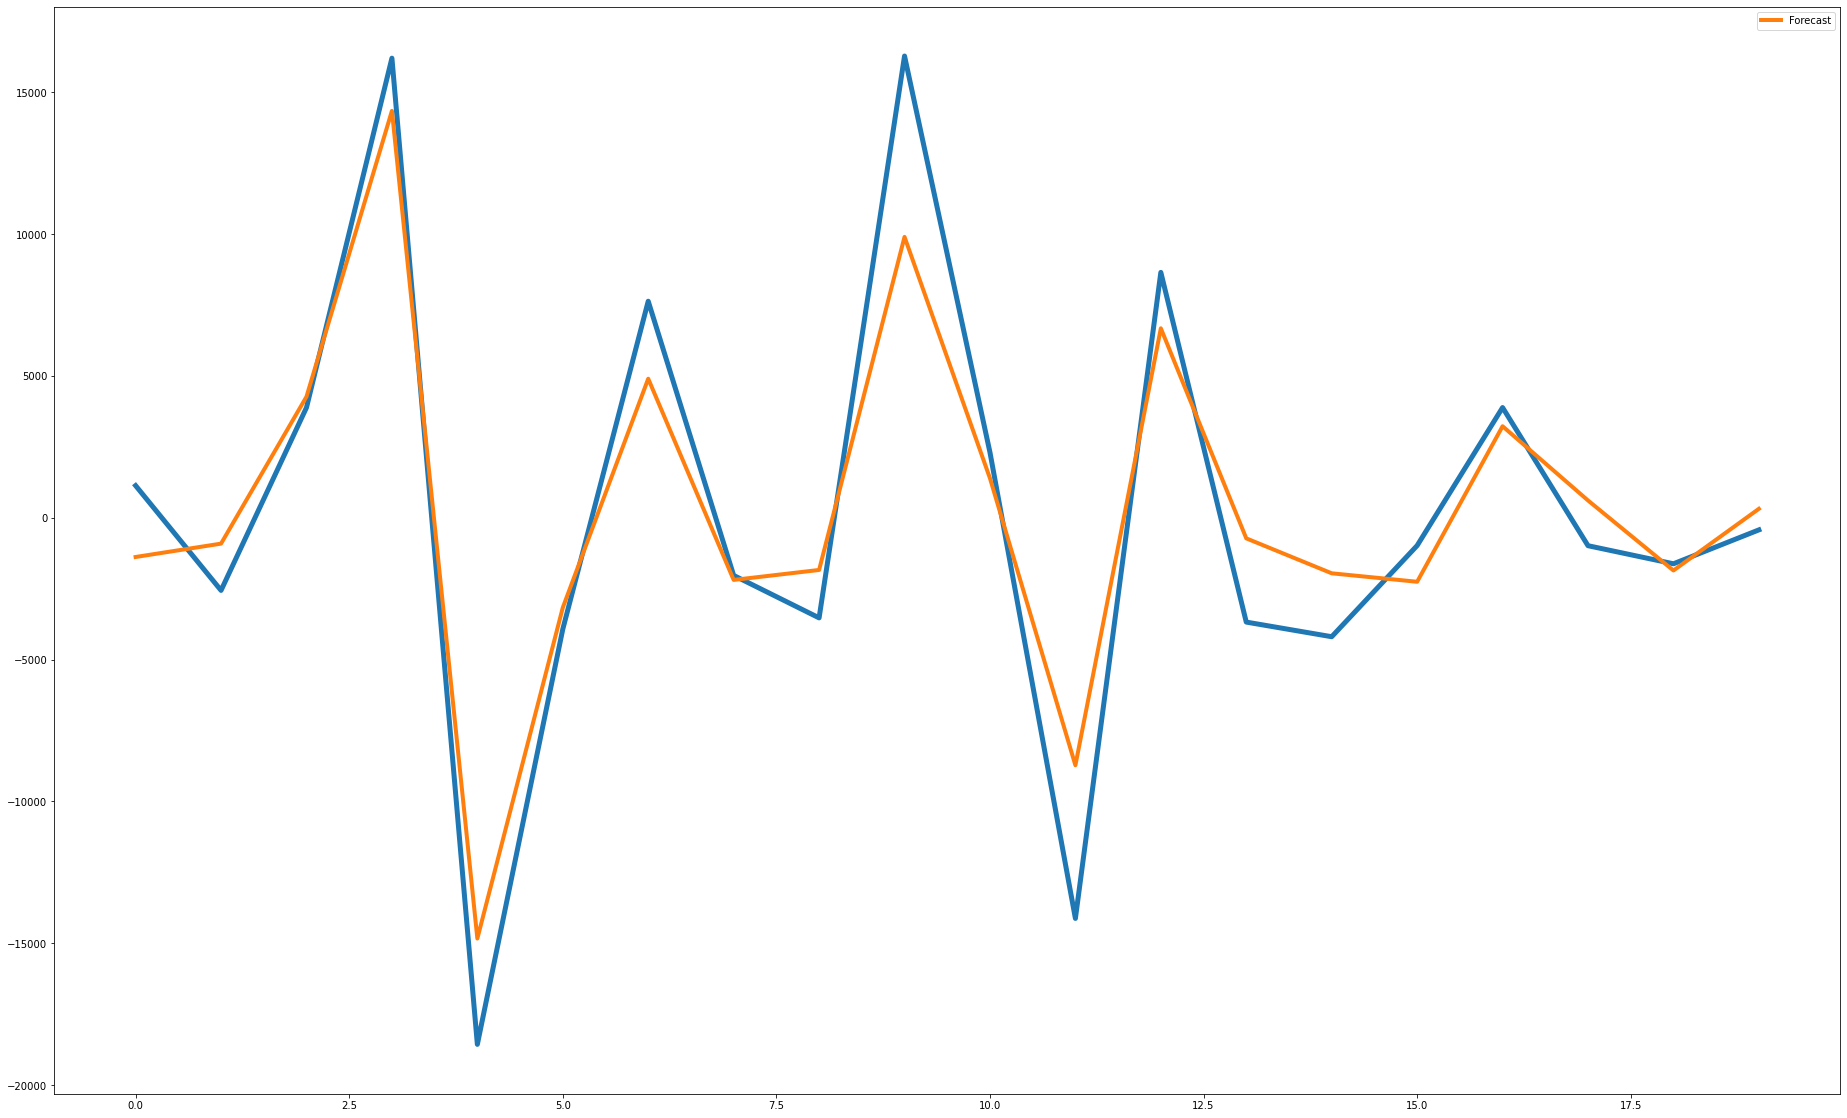

In [17]:
plt.figure(
    figsize=(32, 20)
)
k = 1
forecast1 = winters_es(in_seq1[:-k], 20, alpha=0.05, beta=0.02, gamma=0.6, future_steps=k)
plt.plot(in_seq1[-20:], linewidth=5)
plt.plot(forecast1[-20:], linewidth=4, label='Forecast')
plt.legend()
plt.show()

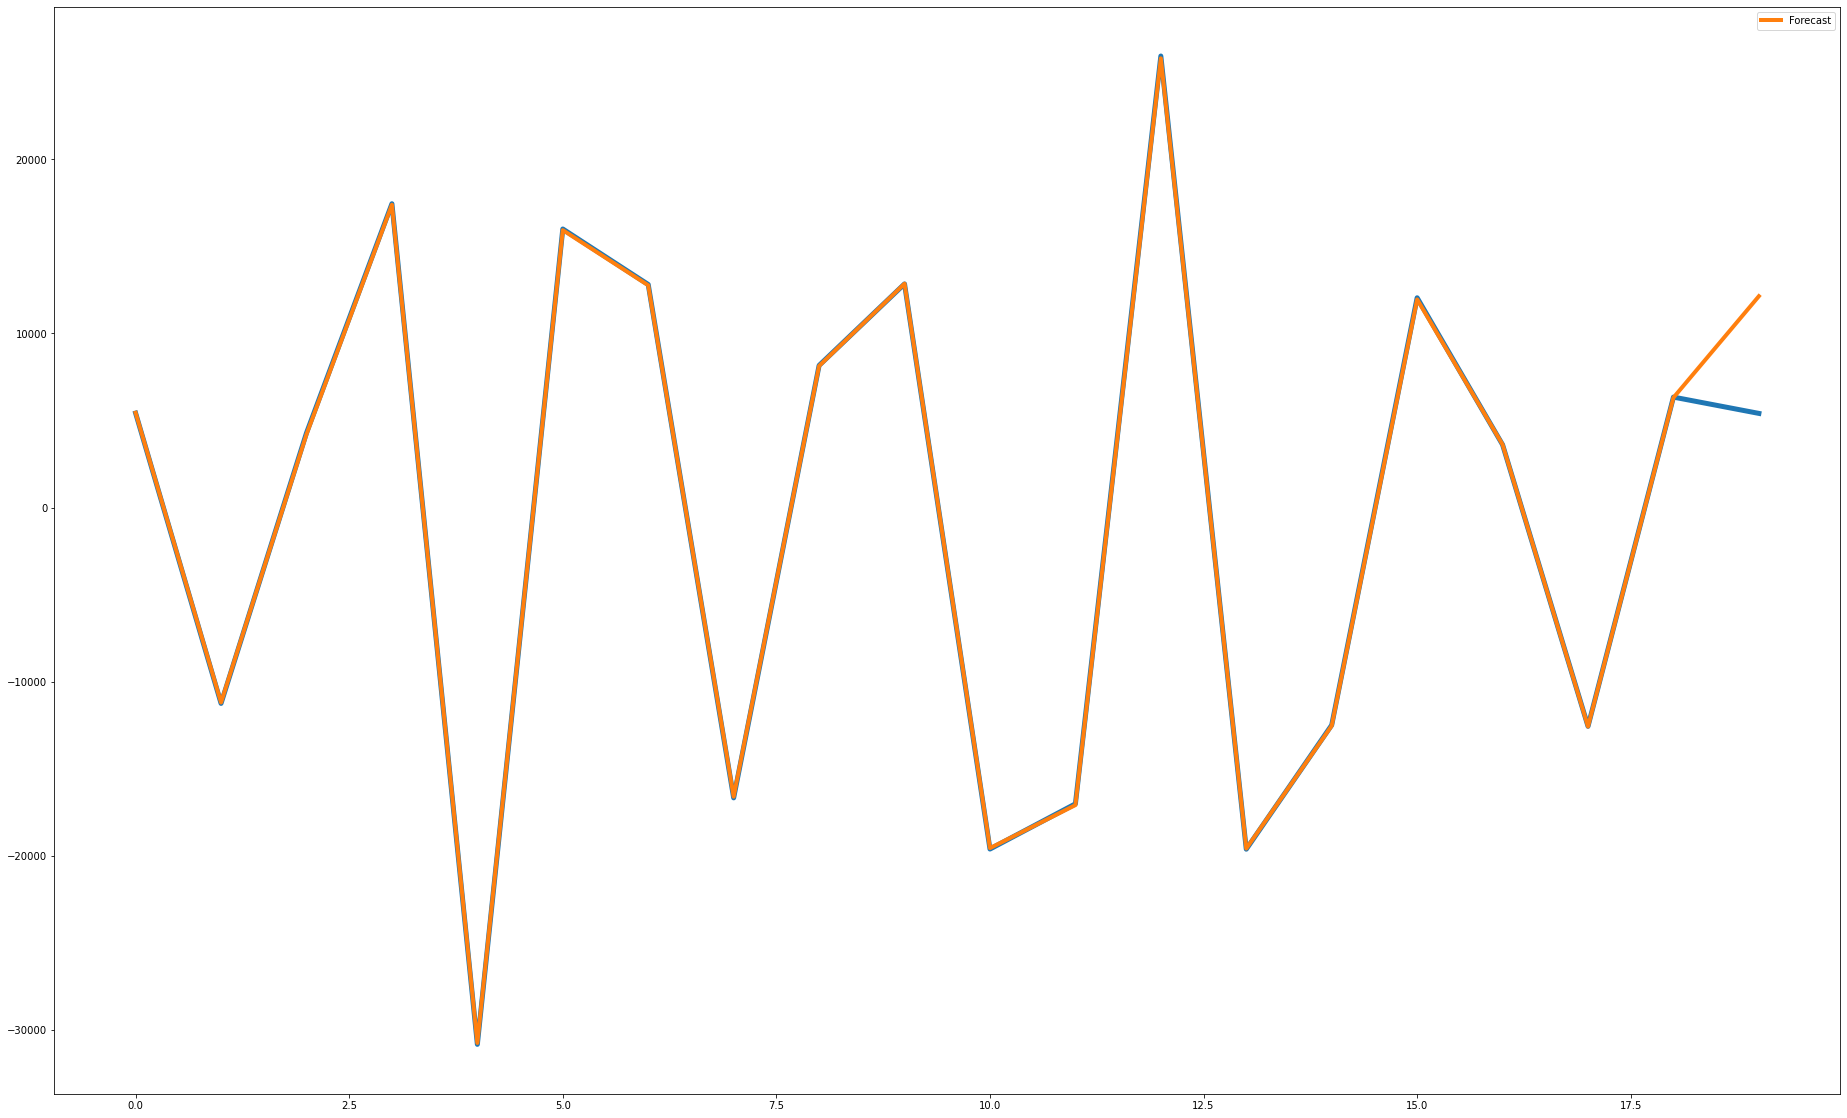

In [18]:
plt.figure(
    figsize=(32, 20)
)
k = 1
forecast2 = winters_es(in_seq2[:-k], 20, alpha=0.5, beta=0.0085, gamma=0.99, future_steps=k)
plt.plot(in_seq2[-20:], linewidth=5)
plt.plot(forecast2[-20:], linewidth=4, label='Forecast')
plt.legend()
plt.show()

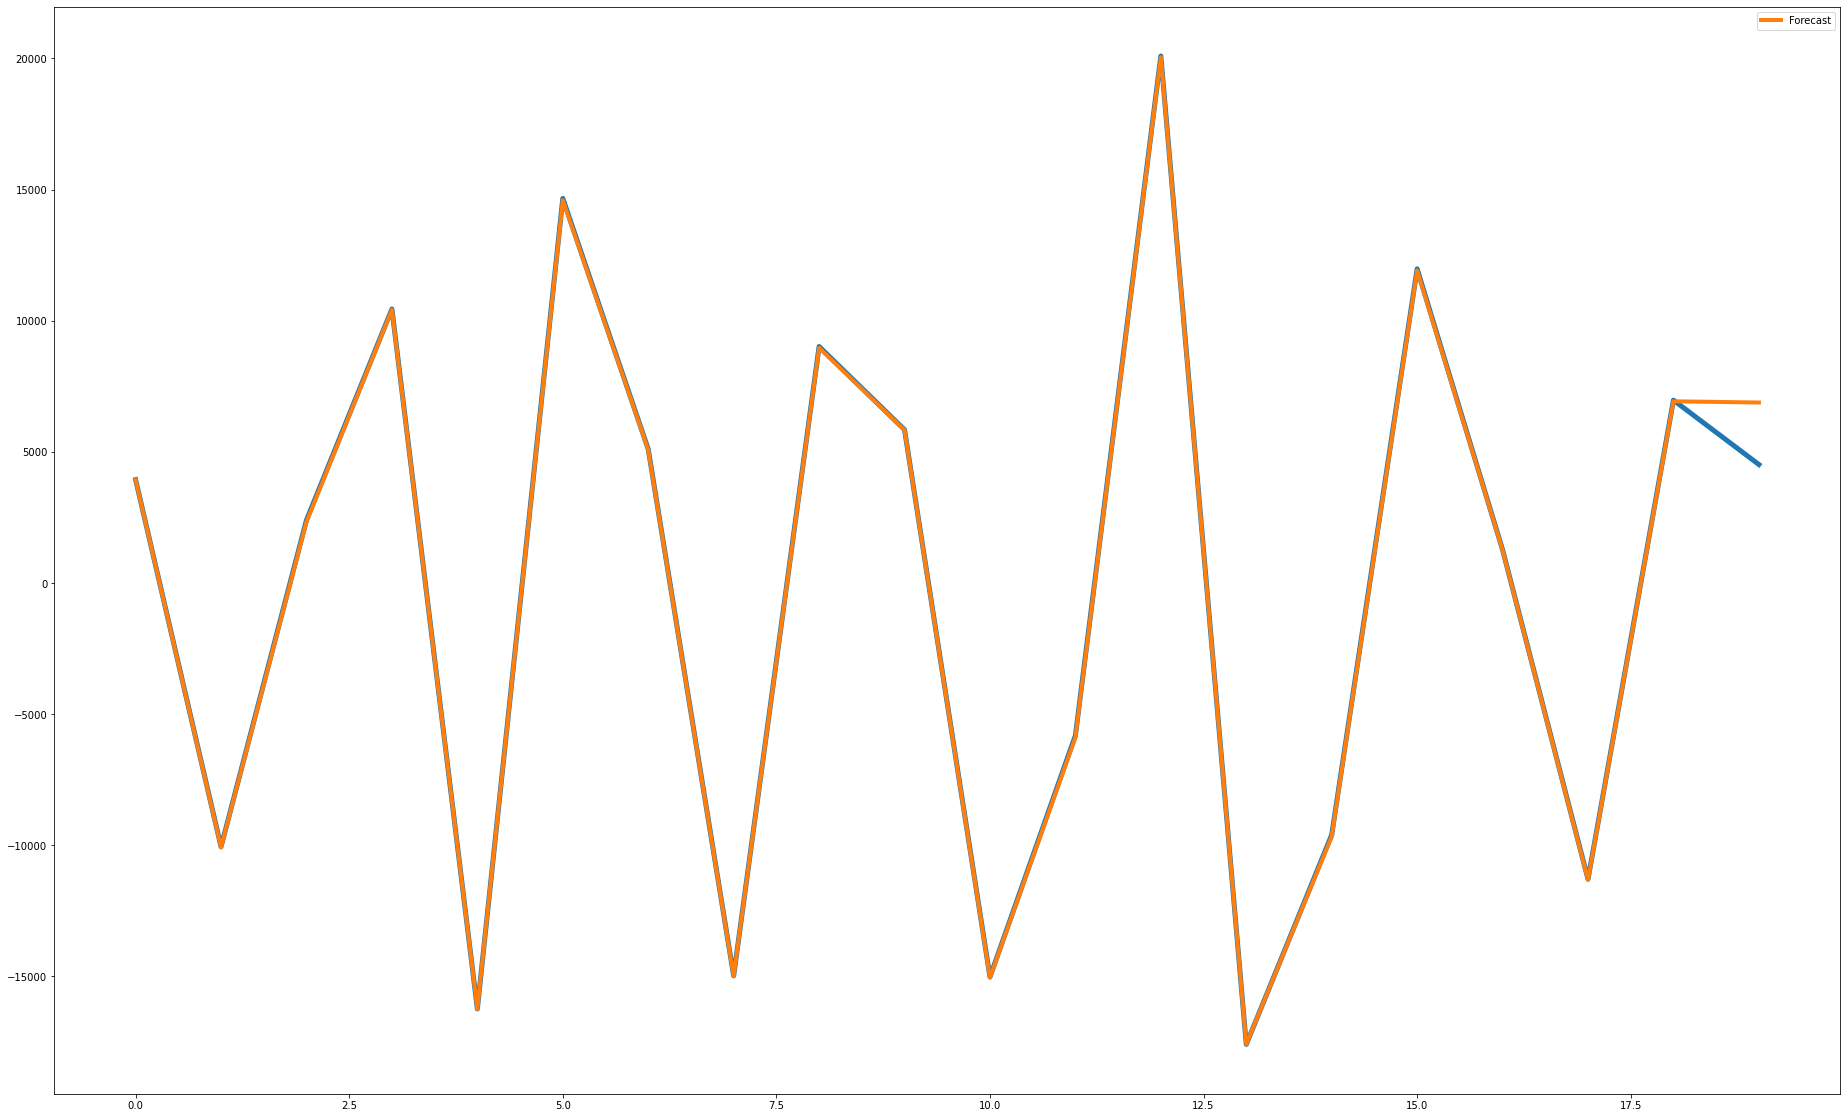

In [19]:
plt.figure(
    figsize=(32, 20)
)
k = 1
forecast3 = winters_es(in_seq3[:-k], 20, alpha=0.75, beta=0.0035, gamma=0.99, future_steps=k)
plt.plot(in_seq3[-20:], linewidth=5)
plt.plot(forecast3[-20:], linewidth=4, label='Forecast')
plt.legend()
plt.show()

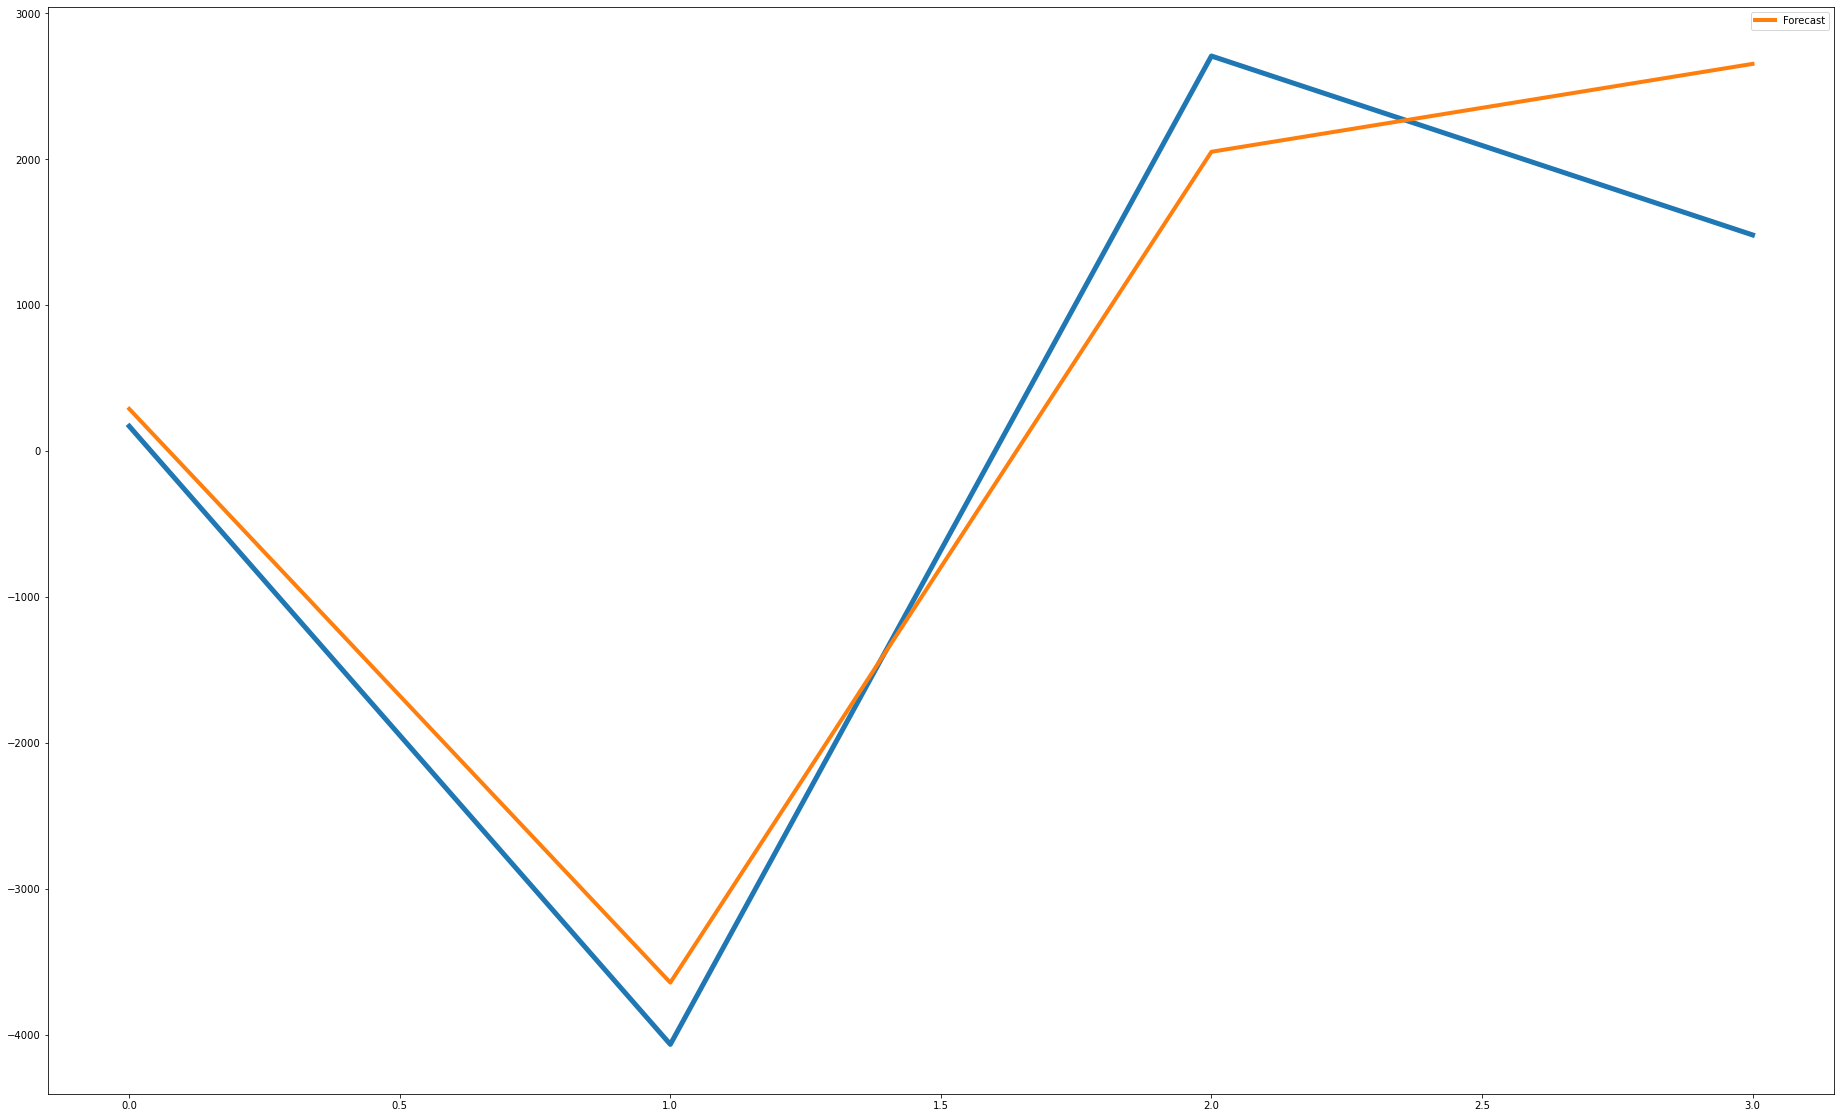

In [20]:
plt.figure(
    figsize=(32, 20)
)
k = 1
forecast4 = winters_es(in_seq4[:-k], 5, alpha=0.8, beta=0.0028, gamma=0.5, future_steps=k)
plt.plot(in_seq4[-4:], linewidth=5)
plt.plot(forecast4[-4:], linewidth=4, label='Forecast')
plt.legend()
plt.show()

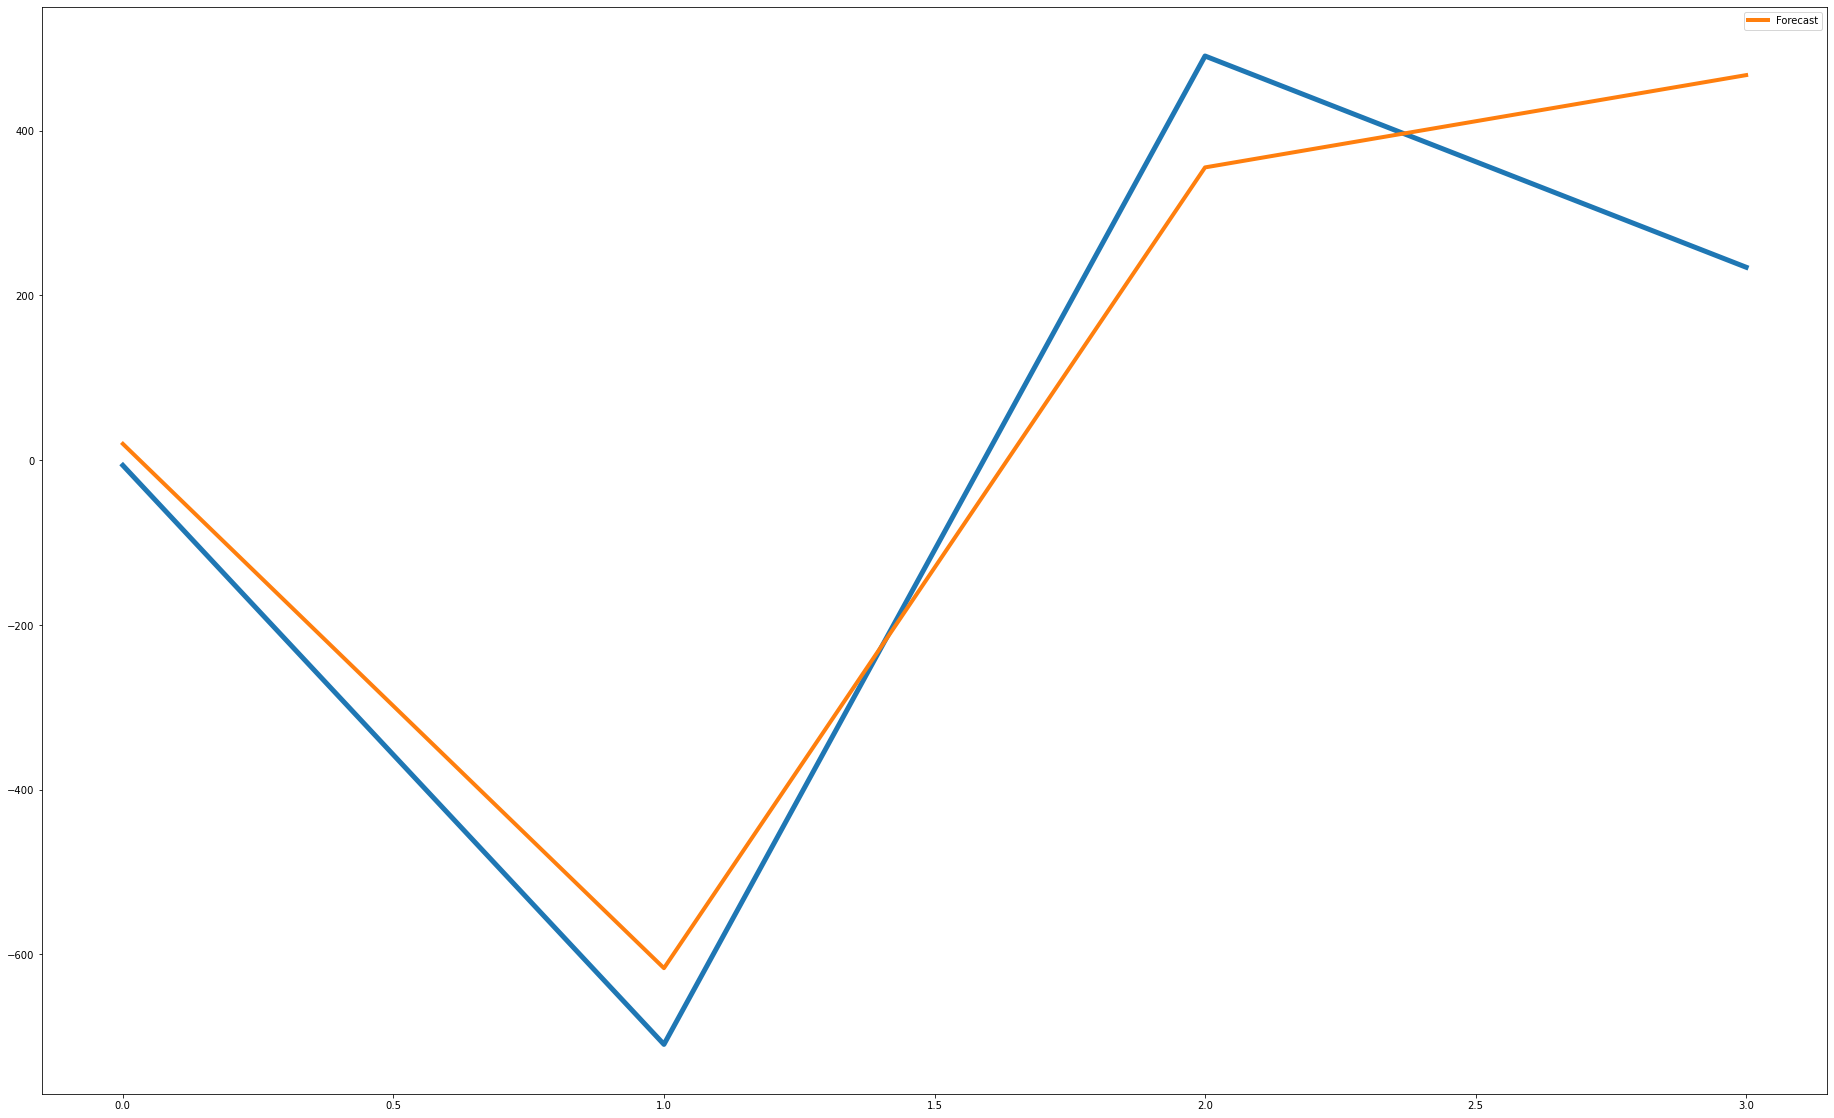

In [21]:
plt.figure(
    figsize=(32, 20)
)
k = 1
forecast5 = winters_es(in_seq5[:-k], 5, alpha=0.76, beta=0.0035, gamma=0.5, future_steps=k)
plt.plot(in_seq5[-4:], linewidth=5)
plt.plot(forecast5[-4:], linewidth=4, label='Forecast')
plt.legend()
plt.show()

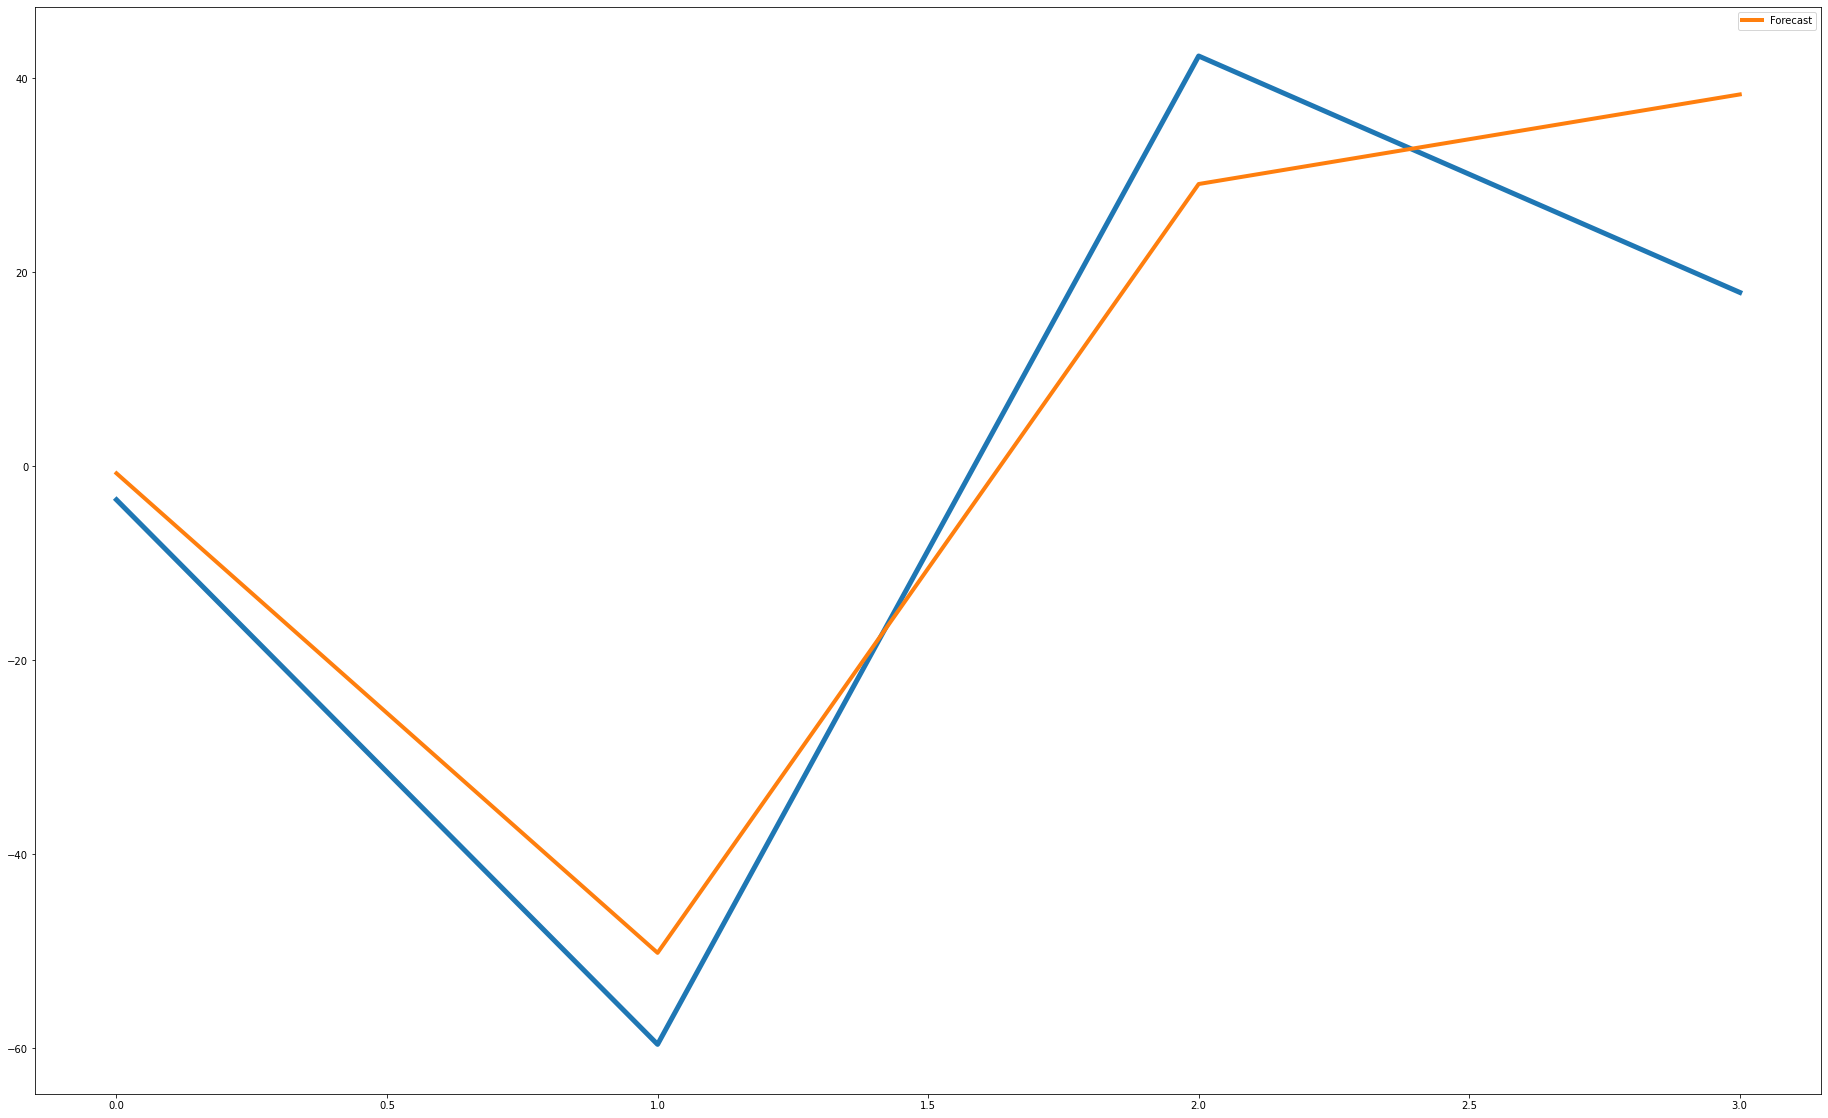

In [22]:
plt.figure(
    figsize=(32, 20)
)
k = 1
forecast6 = winters_es(in_seq6[:-k], 5, alpha=0.72, beta=0.0035, gamma=0.5, future_steps=k)
plt.plot(in_seq6[-4:], linewidth=5)
plt.plot(forecast6[-4:], linewidth=4, label='Forecast')
plt.legend()
plt.show()

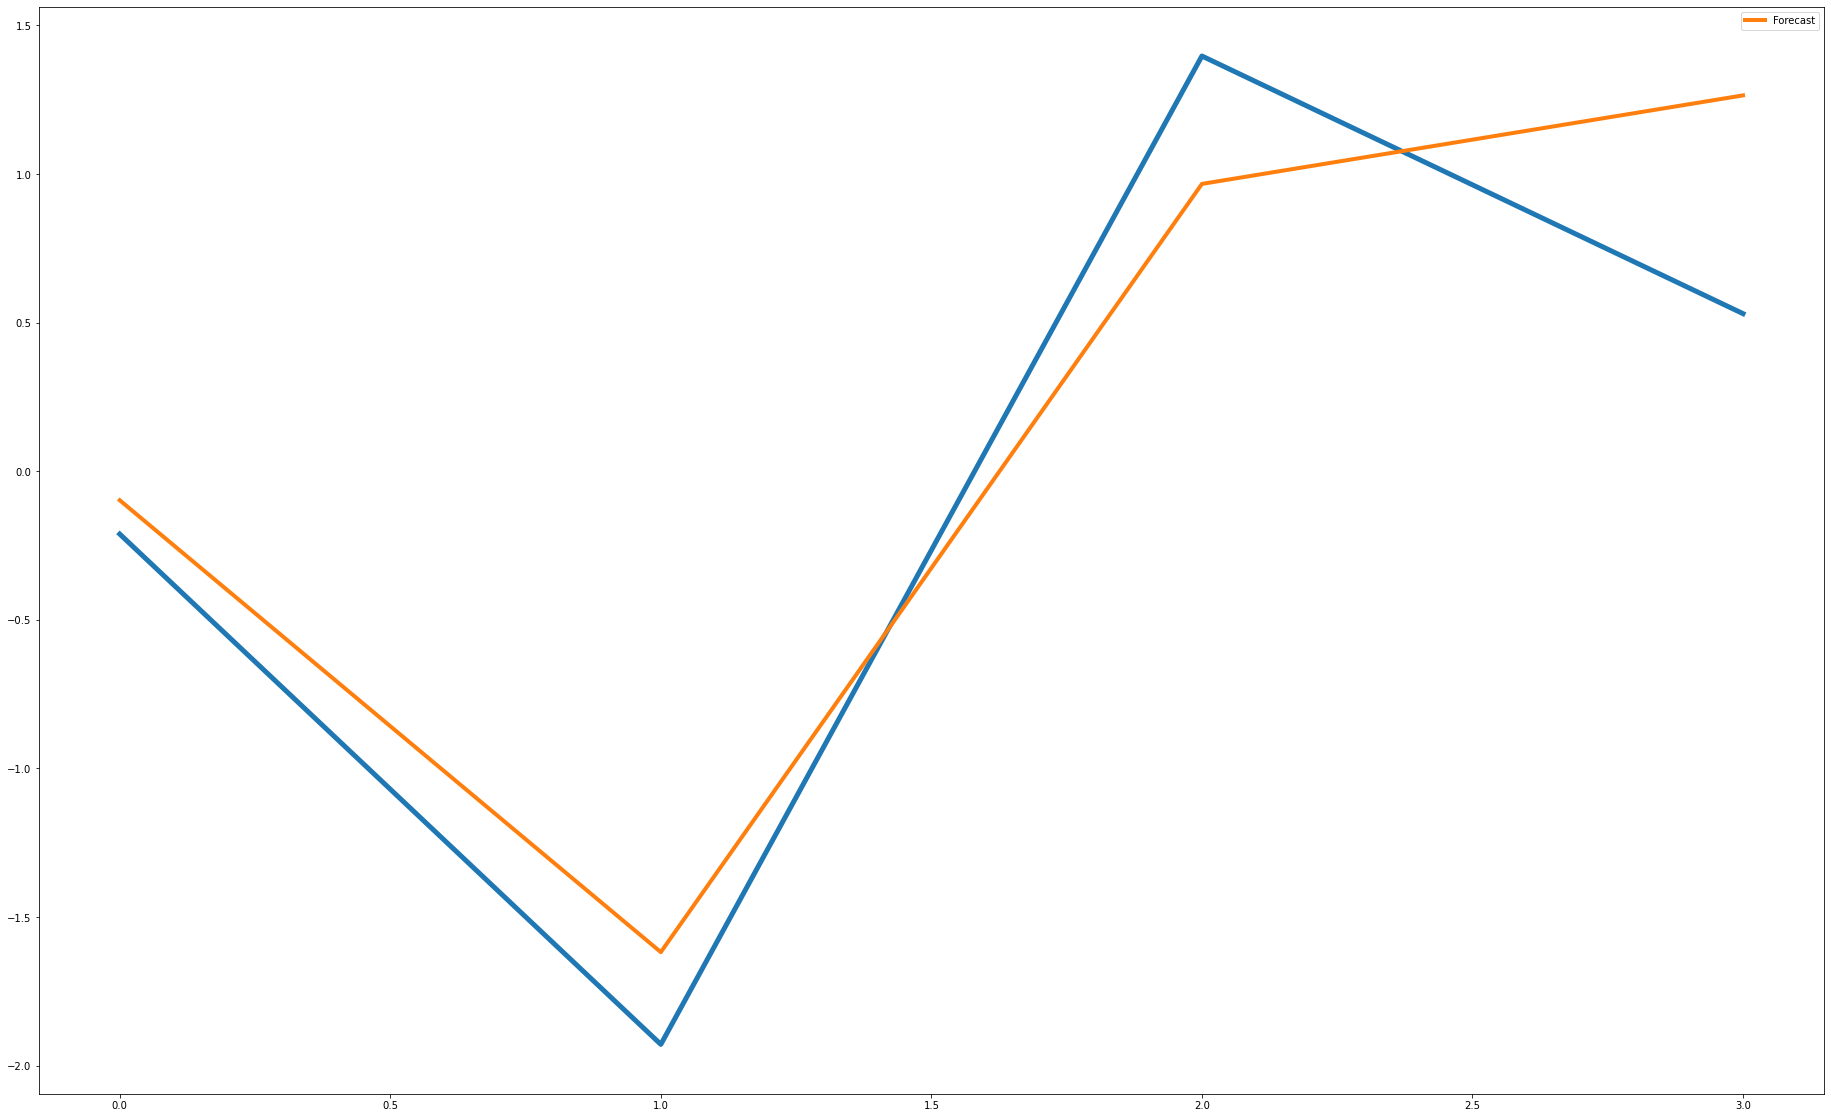

In [23]:
plt.figure(
    figsize=(32, 20)
)
k = 1
forecast7 = winters_es(in_seq7[:-k], 5, alpha=0.72, beta=0.004, gamma=0.5, future_steps=k)
plt.plot(in_seq7[-4:], linewidth=5)
plt.plot(forecast7[-4:], linewidth=4, label='Forecast')
plt.legend()
plt.show()

Real vs Predicted:

55634.7060412431 --- 55726.34174614964
-428.862228543244 --- 314.21541447445406
5409.10420983531 --- 12142.895728476993
4516.63291647322 --- 6881.012851939811
1479.37282456269 --- 2651.1389124550647
234.294674292178 --- 467.543870636613
17.90926744823 --- 38.31074975759881
0.530173797617685 --- 1.2643531033625268


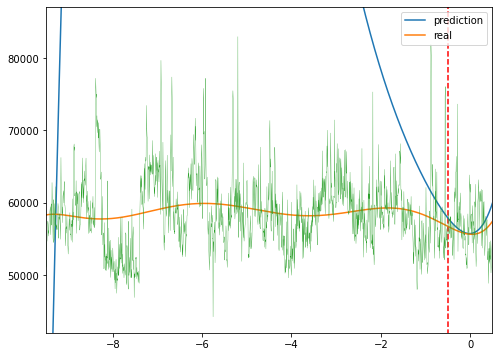

In [24]:
#Predicted params:
theta0_ = forecast0[-1]
theta1_ = forecast1[-1]
theta2_ = forecast2[-1]
theta3_ = forecast3[-1]
theta4_ = forecast4[-1]
theta5_ = forecast5[-1]
theta6_ = forecast6[-1]
theta7_ = forecast7[-1]

#True params:
theta0 = in_seq0[-1]
theta1 = in_seq1[-1]
theta2 = in_seq2[-1]
theta3 = in_seq3[-1]
theta4 = in_seq4[-1]
theta5 = in_seq5[-1]
theta6 = in_seq6[-1]
theta7 = in_seq7[-1]

print('Real vs Predicted:\n')
print(str(theta0) + ' --- ' + str(theta0_))
print(str(theta1) + ' --- ' + str(theta1_))
print(str(theta2) + ' --- ' + str(theta2_))
print(str(theta3) + ' --- ' + str(theta3_))
print(str(theta4) + ' --- ' + str(theta4_))
print(str(theta5) + ' --- ' + str(theta5_))
print(str(theta6) + ' --- ' + str(theta6_))
print(str(theta7) + ' --- ' + str(theta7_))

#Window + Predicted trend:
window_selected_index = round((tiempo_final+scope)/diezmado)
Window_Selected = time_serie[window_selected_index*diezmado:window_selected_index*diezmado+Tsventana]

t = np.linspace(-(Tsventana-1), 0, Tsventana) + math.ceil(scope/2)
t_step = 1/(2*t[-1])
t = t*t_step
pol = theta0 + theta1*t + theta2*pow(t,2) + theta3*pow(t,3) + theta4*pow(t,4) + theta5*pow(t,5) + theta6*pow(t,6) + theta7*pow(t,7)
pol_ = theta0_ + theta1_*t + theta2_*pow(t,2) + theta3_*pow(t,3) + theta4_*pow(t,4) + theta5_*pow(t,5) + theta6_*pow(t,6) + theta7_*pow(t,7)

fig, ax = pyplot.subplots(figsize=(8, 6)) #New figure
ax.plot(t, pol_);
ax.plot(t, pol);
pyplot.legend(['prediction', 'real'], loc='upper right')
pyplot.vlines(t[-scope], 0, 1.05*max(Window_Selected), linestyles ="dashed", colors="r")
ax.set_xlim(t[0], t[-1])
ax.plot(t, Window_Selected, linewidth=0.3);
pyplot.ylim((0.95*min(Window_Selected), 1.05*max(Window_Selected)))

np.savetxt('outputsHoltWintersAndAR/WindowTest.txt', Window_Selected, delimiter=',');
np.savetxt('outputsHoltWintersAndAR/polTruth.txt', pol, delimiter=',');
np.savetxt('outputsHoltWintersAndAR/polPredicted.txt', pol_, delimiter=',');

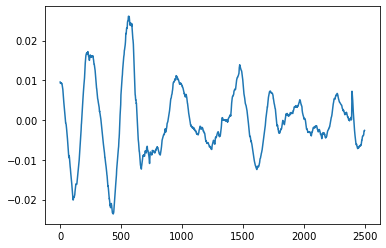

1.8271104404861122e-13
0.3333333333333333
0.0
1.0


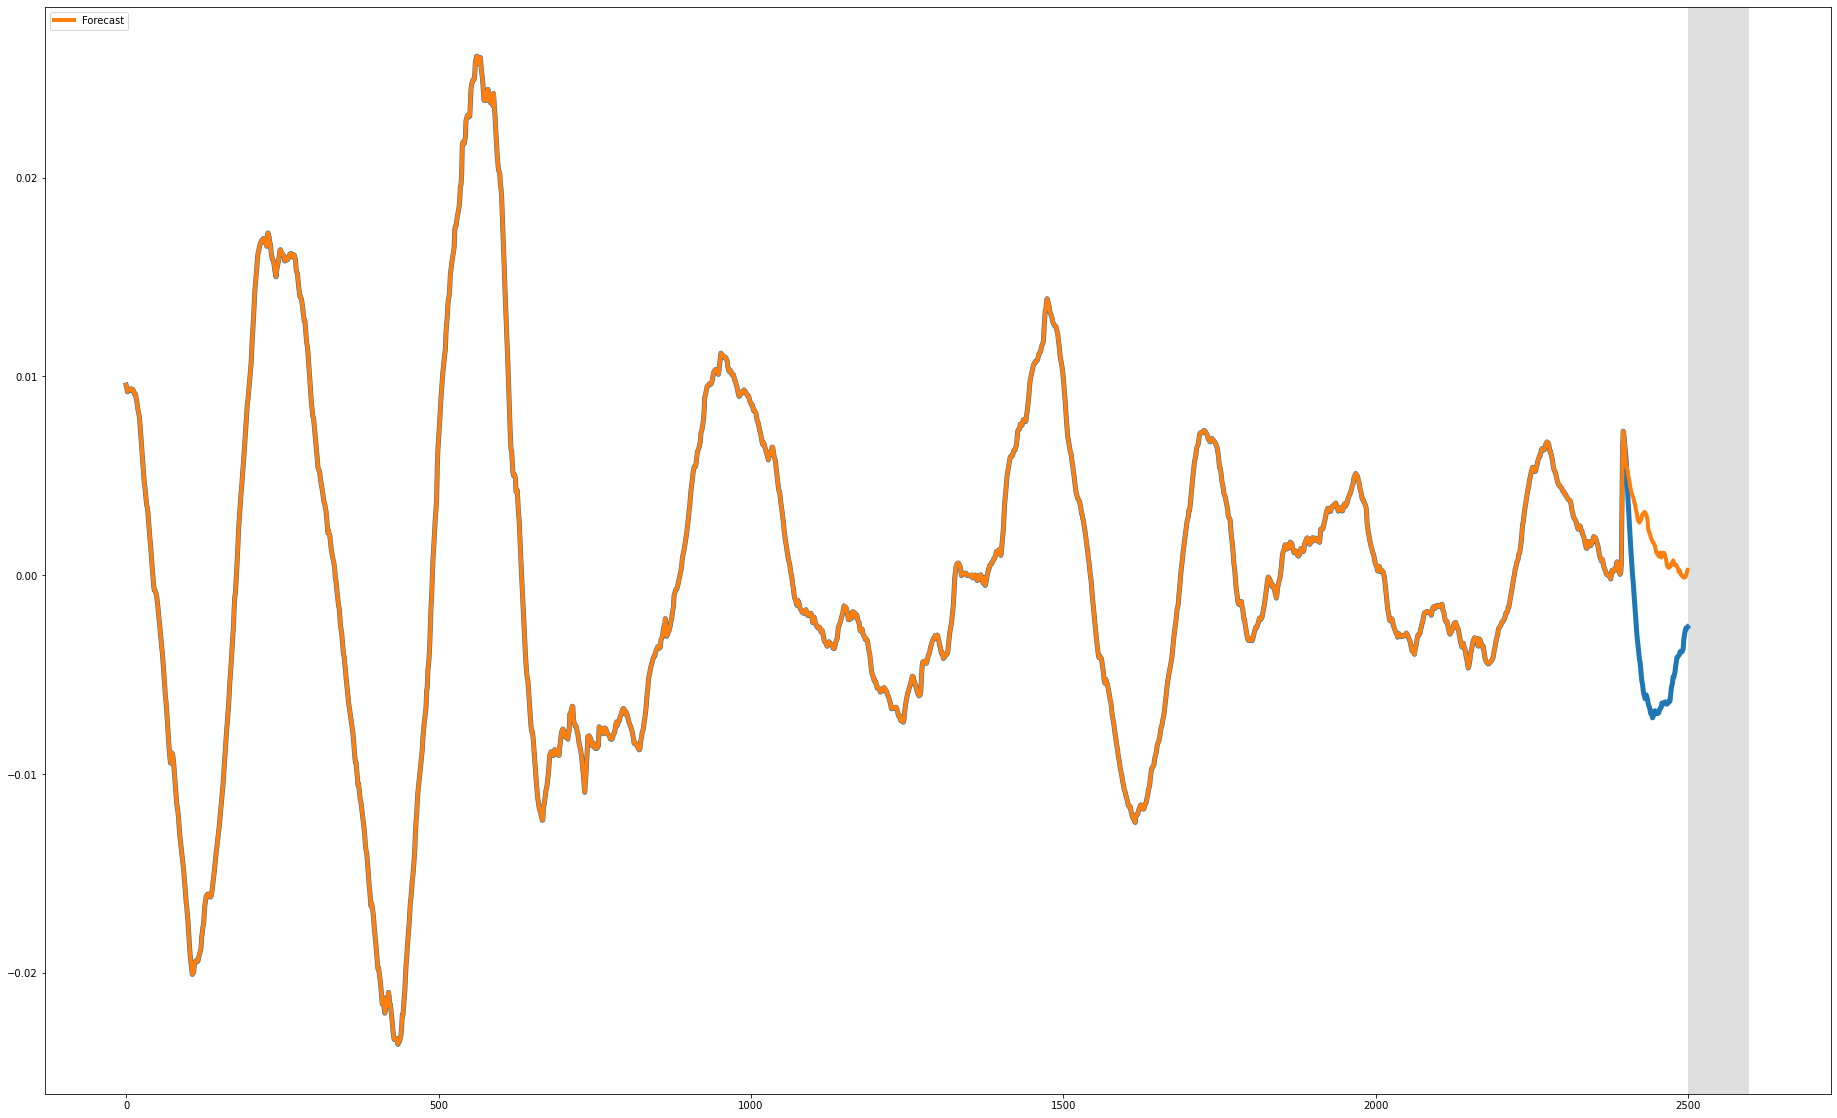

In [25]:
import pandas as pd

df = pd.read_excel('thetaevolutionexample.xlsx')
#df = pd.read_csv('Tuesday_concat_traffic.csv', names=['Traffic_data']) #Con names añadimos una cabecera

serie = df.squeeze()
serie_list = serie.tolist()
serie_list = serie_list[-2500:]

# summarize first few rows
from matplotlib import pyplot as plt
plt.plot(serie_list)
plt.show()

#OBTENER alpha, beta y gamma: FUERZA BRUTA
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt

k = 0
errormin = float('inf')
alphamin = 0; betamin = 0; gammamin = 0;

alphas = np.linspace(0, 1, num = 4)
betas = alphas
gammas = alphas
for alpha in alphas:
    for beta in betas:
        for gamma in gammas:
            forecast = winters_es(serie_list, 420, alpha, beta, gamma, future_steps=k)
            error = np.mean(np.square(np.subtract(serie_list, forecast)))
            if(error < errormin):
                errormin = error
                alphamin = alpha; betamin = beta; gammamin = gamma

print(errormin)
print(alphamin)
print(betamin)
print(gammamin)

plt.figure(
    figsize=(32, 20)
)

k = 100
last_months = list(range(len(serie_list)-1, len(serie_list)-1 + k))
forecast = winters_es(serie_list[:-k], 450, alpha=alphamin, beta=betamin, gamma=gammamin, future_steps=k)

plt.plot(serie_list, linewidth=5)
plt.plot(forecast, linewidth=4, label='Forecast')
plt.axvspan(*(last_months[0], last_months[-1]), 
            facecolor='grey', 
            alpha=0.25)
plt.legend()
plt.show()

In [10]:
np.savetxt("HoltWinters_3minTuesdayConcatTraffic.txt", serie_list)
np.savetxt("HoltWinters_3minForecastTuesday.txt", forecast)

In [11]:

a = [1, 2, 3]
b = [2, 7, 4]
print(np.mean(np.square(np.subtract(a, b))))

9.0
